## Comparison of ordinary differential equation solving methods in plotting the orbits of two- and three-body systems

## 1. Introduction

Throughout human history, astronomers have tried to understand our place in the universe, or to this extent, even in the solar system. This continued to be the case until the early 1600s when Johannes Kepler used the data collected by Tycho Brahe, the most accurate astronomical observations at the time [1] to show that the planets in the solar system all followed elliptical orbits around the Sun with the Sun at one focus of these ellipses. This result backed the Copernican model and improved upon it, especially in terms of the problematic Martian orbit [1], by correcting the assumption of circular planetary orbits.

From this realisation, Kepler composed three laws of planetary motion. The third of these laws was that the square of the orbital period of a planet is proportional to the cube of the semi-major axis of its orbit. This was proved by the end of the seventeenth century by Isaac Newton in his theory of universal gravitation which showed how these elliptical orbits could be predicted using his inverse-square law of gravity.

For this project, all the bodies involved were treated as point particles with their respective masses. Consequently, for a two-body system (for example, the Earth's orbit around the Sun), the force on the planet by the star, as given by Newton's law of gravitation, will be

\begin{equation*}
F = -\frac{G M m}{r^2}
\end{equation*}

where
- $G$ is the gravitational constant
- $M$ is the mass of the star
- $m$ is the mass of the planet
- $r$ is the distance between the star and the planet

Here, the force points towards the star, hence the minus sign.

Assuming that the mass of the star is much greater than the planet's mass, the equal-but-opposite gravitational force acting on the star will be negligible- it can be approximated that the star will remain at rest in its original position. The star's original position, for the large part of the report, will be at the origin. Since the gravitational force only depends on the planet's distance from the star, the force acting on it is spherically symmetric. From this, a planet starting in the xy-plane, such that the vector quantites of its position, velocity and the force acting on it are all pointing in the xy-plane at time ${t = 0}$, then nothing will point the z-direction- the planet will remain in the xy-plane. [2] This simplification allowed the plots in this report to be two-dimensional in only the xy-plane and express the evolutions of the planets' orbits over a given time period, 100 years in this case.

**This project focused on modelling the approximate planetary orbits two- and three-body systems, namely the Earth-Sun and Mercury-Earth-Sun systems, using three integration methods: the fourth-order Runge-Kutta method, and the ode and odeint methods from the scipy.integrate module.**

To complete this comparison between the three integration methods, various initial positions and velocities were used to show the limitations of each method. For these integration methods, the fourth-order Runge Kutta (RK4) method was coded for using a function while the other two methods, ode and odeint, were used by importing them from the scipy.integrate module.

To code for the two-body system of a planet orbiting a star, it was assumed that the star's mass was much greater than the planet's mass (for the Earth and the Sun, ${\frac{M}{m} \approx 3 \times 10^{5}}$) which, after substituting into Newton's second law of motion, produces the following differential equation:

\begin{equation}
\ddot {\mathbf{r}} = \frac{G M} {r^2} \mathbf{r}
\tag{1}
\end{equation}

where ${\ddot {\mathbf{r}}}$ is the second time derivative of the distance- it is the acceleration of the planet.

Then solving this equation gives the Keplerian motion for an orbit [3]; however, this is not very accurate and, so is only applicable for first-order approximations.

To expand the orbit approximations to two planets orbiting a star, Mercury and the Earth orbiting the Sun for this project, the following equations were used.

\begin{equation}
{m_1}\frac{d^2 \mathbf{r_1}}{d t^2} = -\frac{G M m_1}{r_1^3}\mathbf{r_1} + \frac{G m_1 m_2}{r_{21}^3}\mathbf{r_{21}}
\tag{2}
\end{equation}

\begin{equation}
{m_2}\frac{d^2 \mathbf{r_2}}{d t^2} = -\frac{G M m_2}{r_2^3}\mathbf{r_2} - \frac{G m_1 m_2}{r_{21}^3}\mathbf{r_{21}}
\tag{3}
\end{equation}

where
- $G$ is the gravitational constant
- $M$ is the mass of the star
- $m_1$ and $m_2$ are the masses of the first and second planets, respectively,
- $\mathbf{r_1}$ and $\mathbf{r_2}$ are the distances between the star and the first and second planets, respectively.
- $\mathbf{r_{21}}$ is the distance between the two planets (from the first planet to the second) such that ${\mathbf{r_{21}} = \mathbf{r_2} - \mathbf{r_1}}$

Then, dividing equations 2 and 3 by $m_1$ and $m_2$, respectively, the two equations needed were:

\begin{equation}
\frac{d^2 \mathbf{r_1}}{d t^2} = -\frac{G M}{r_1^3}\mathbf{r_1} + \frac{G m_2}{r_{21}^3}\mathbf{r_{21}}
\tag{4}
\end{equation}

\begin{equation}
\frac{d^2 \mathbf{r_2}}{d t^2} = -\frac{G M}{r_2^3}\mathbf{r_2} - \frac{G m_1}{r_{21}^3}\mathbf{r_{21}}
\tag{5}
\end{equation}

Here, for additional clarity, the acceleration of the planet was rewritten from ${\ddot {\mathbf{r}}}$ in equation 1 to ${\frac{d^2 \mathbf{r_1}}{d t^2}}$ and ${\frac{d^2 \mathbf{r_2}}{d t^2}}$ in equations 2 and 4 and equations 3 and 5, respectively.

Furthermore, the solar mass, ${M = 1.989 \times 10^{30}} kg$ was taken as the unit mass so that the masses of Mercury, ${m = 3.3010 \times 10^{23}} kg$ [4], and the Earth, ${m = 5.9722 \times 10^{24}} kg$ [4], were expressed in solar masses: ${m = 1.65963 \times 10^{-7}} M$ and ${m = 3.00261 \times 10^{-6}} M$ for Mercury and the Earth, respectively. As well as this, all of the orbits modelled in this report were over a time of 100 years.

## 2. Methods

The method was largely split into three parts: modelling the Earth-Sun system, representing the orbits of the Mercury-Earth-Sun system and, finally, creating a hypothetical system of an Earth-like planet orbiting a binary star system composed of two Sun-like stars. Here, the first part focused on two-body systems and was used to test both the equations formulated and the RK4 method function.


After this, the other second part focused on using all three integration methods to plot the orbits of Mercury and the Earth around the Sun. Following this, the part was based on plotting the second variation of a three-body system. Here, this was a hypothetical system of an Earth-like planet orbiting two Sun-like stars.

### 2.1. Defining constants and accessing the integration methods

To be able to use all three integration methods, ode and odeint are imported from the scipy.integrate library. The function for the RK4 method will be created after all constants are defined. Additionally, other necessary libraries like numpy and matplotlib are also imported.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode, odeint

All necessary global constants are defined here. Additionally, the total time for each orbit and the number of points at which each calculation will happen during that orbit are defined.

In [2]:
G = 6.67408e-11 # Set the value of G
Gm_star = 4 * (np.pi ** 2) # Scaled mass of star in solar masses (1 for the Sun, in this case)

m_1 = 3.00261e-6 * Gm_star # Earth mass
m_2 = 1.65963e-7 * Gm_star # Mercury mass

t = 0
t_tot = 100 # Time in years
step_num = 50000 # 50,000 results is a much better energy and angular momentum graph than 10,000
dt = t_tot / step_num
timestep = np.linspace(t, t_tot, step_num)

Here, the value of step_num was changed after creating plots for the three two-body systems using the different integration methods. The increase in steps from 10,000 to 50,000 greatly improved the plots of total energy and total angular momentum but, as shown in the Discussion section, this led to the loss of precession of the perihelion of Mercury's orbit.

Following this, a function was created for the fourth-order Runge Kutta (RK4) method. [5]

In [3]:
def RK4_func(t, state_current, func, dt):
    RK_1 = func(t, state_current) * dt
    RK_2 = func(t + (dt / 2), state_current + (RK_1 / 2)) * dt
    RK_3 = func(t + (dt / 2), state_current + (RK_2 / 2)) * dt
    RK_4 = func(t + dt, state_current + RK_3) * dt

    return state_current + ((1/6) * (RK_1 + (2 * RK_2) + (2 * RK_3) + RK_4))

### 2.2. Modelling the orbit of the Earth around the Sun

To calculate the necessary quantities to plot the orbit, a function was created for each, below.

The 's1_p1' function takes in the current time, t, and the 'state_current' array. This was the derivative function that was integrated to calculate the planet's position and velocity components at a time ${{t + dt}}$.

The 'energy_p1' function calculates the planet's energy at the current time.

Similarly, the 'ang_mom_1p' function calculates the planet's current angular momentum.

In [4]:
# Derivative function that will be integrated with the different integration methods
def s1_p1(t, state_current):
    rad1 = np.array([state_current[0], state_current[1]])
    mag_rad1 = np.sqrt(rad1.dot(rad1))
    a1 = -((Gm_star * rad1) / (mag_rad1 ** 3))

    return np.array([state_current[2], state_current[3], a1[0], a1[1]])

# Function to calculate the energy of the planet at each position in its orbit (calculated from the function above)
def energy_1p(state_current):
    rad1 = np.array([state_current[0], state_current[1]])
    mag_rad1 = np.sqrt(rad1.dot(rad1))
    vel1_sq = np.sqrt((state_current[2] ** 2) + (state_current[3] ** 2))

    energy = ((m_1 * vel1_sq) / 2) - (Gm_star * (m_1 / mag_rad1))

    return energy

# Function to calculate the angular momentum of the planet at each position in its orbit
def ang_mom_1p(state_current):
    ang_mom = m_1 * ((state_current[0] * state_current[3]) - (state_current[1] * state_current[2]))

    return ang_mom

The Earth's initial state is defined as an array in the form shown below. In this, the third and fourth components in the array are the x and y components of the planet's velocity, respectively.

In [5]:
# State form: [x1, y1, vx1, vy1]
# Plotting using initial conditions of the Earth around the Sun
state_initial_1p = np.array([1, 0, 0, np.sqrt(Gm_star / 1)])

state_RK_1p = np.ndarray((1, 4), np.float)
for i in range(4):
    state_RK_1p[0, i] = state_initial_1p[i]

This orbit was calculated and plotted as an exercise to make sure the method was working (in particular, the RK4 function made previously), and that the equations used were correct and properly coded.

In [6]:
t = 0 # t is set to 0 at the start each time new orbits are plotted.

while (t < t_tot):
    state_RK_1p = np.append(state_RK_1p, [RK4_func(t, state_RK_1p[-1,:], s1_p1, dt)], axis = 0)
    t += dt

# Separates the state_RK_1p array into its position and velcocity arrays
xy_RK4_1p = np.array([state_RK_1p[0:, 0], state_RK_1p[0:, 1]])
v1_RK4_1p = np.array([state_RK_1p[0:, 2], state_RK_1p[0:, 3]])

energy_initial_1p = energy_1p(state_RK_1p[0, :]) # Initial energy to caclulate the percentage change in energy
energy_RK_1p_perc = [] # Empty list to store the percentage change in energy values

ang_mom_initial_1p = ang_mom_1p(state_RK_1p[0, :]) # Initial value of the angular momentum to calculate the percentage change in angular momentum
ang_mom_RK_1p_perc = [] # Empty list to store the percentage change in angular momentum

for i in np.arange(0, t_tot, dt):
    j = i * 500 # Multiply by 500 to get an integer to use as the index below

    # Calculates and appends the percentage change in energy relative to the initial energy
    energy_RK_1p_perc.append((energy_1p(state_RK_1p[int(j), :]) - energy_initial_1p) / energy_initial_1p)

    # Like the energy above, this calculates and appends the percentage change in angular momentum
    ang_mom_RK_1p_perc.append((ang_mom_1p(state_RK_1p[int(j), :]) - ang_mom_initial_1p) / ang_mom_initial_1p)

From this, the calculated orbit of the Earth around the Sun was plotted. For this, the first and second elements of the 'xy_RK4_1p' array were separated as those are the x and y components of the planet's position. Following this, the lines for each element on the plot were taken and set to the default widths when being displayed in the legends box [6].

These separated elements from 'xy_RK4_1p' were then plotted, below, to visualise the Earth's orbit around the Sun over a time period of 100 years. As with all the orbits in this report, the eccentricity of the orbit was assumed to be 0 such that it was circular, as postulated by the heliocentric Copernican theory. In reality, however, this is not the case and orbits are generally elliptical. This point is discussed further in the Conclusions section.

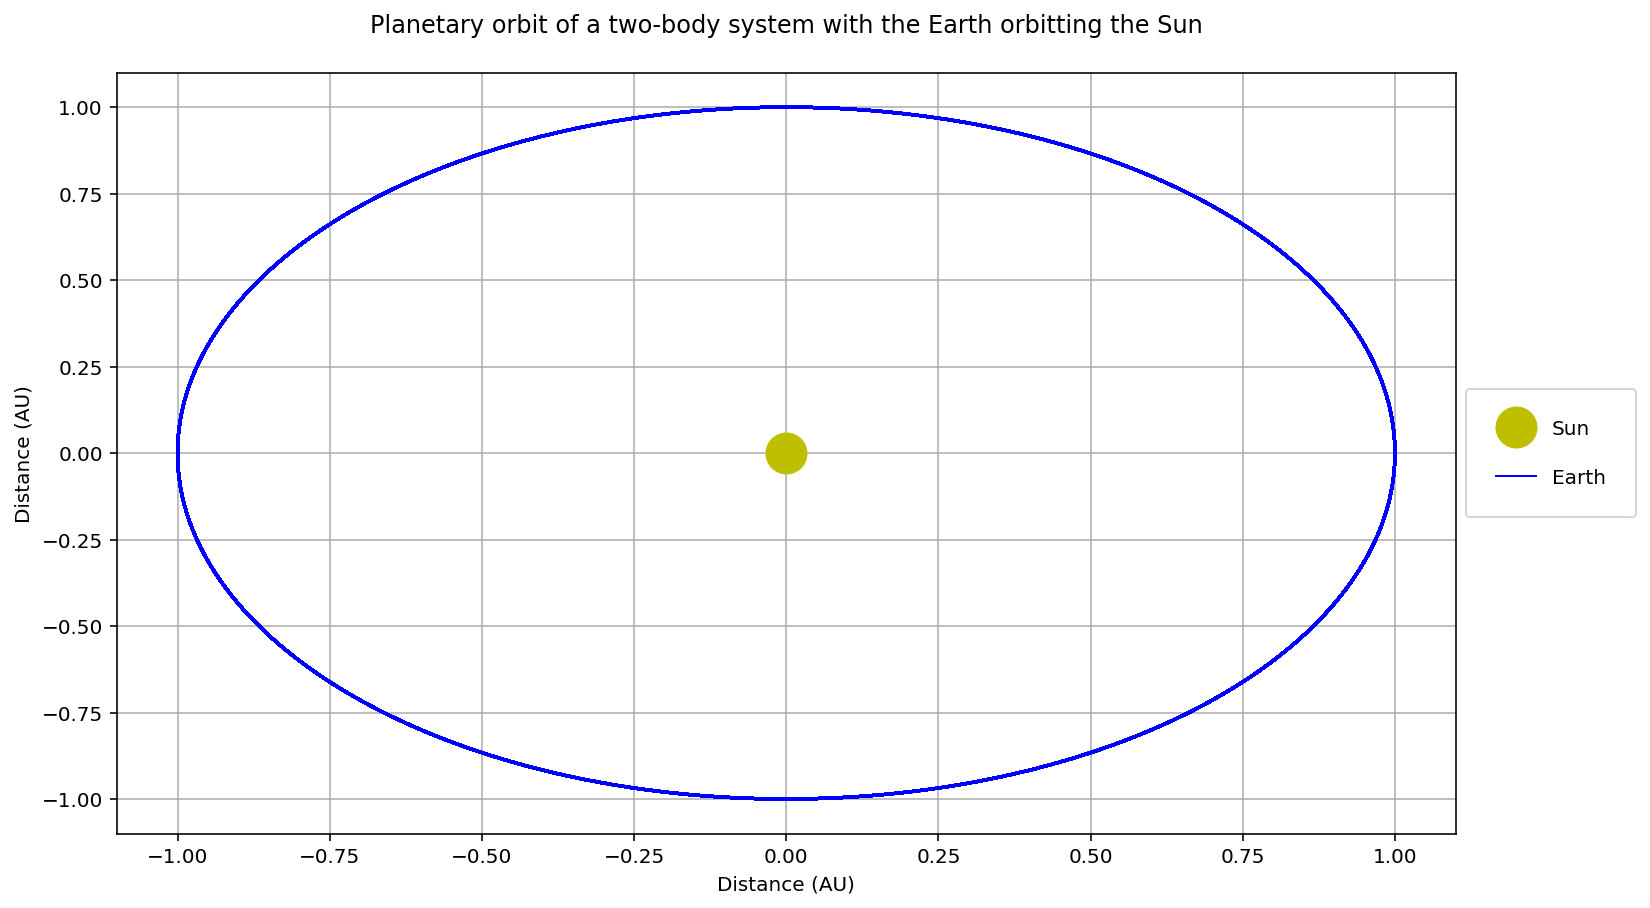

In [7]:
plt.figure()

plt.plot(0, 0, 'yo', linewidth = 2, markersize = 20, label = 'Sun') # Plots the star
plt.plot(xy_RK4_1p[0], xy_RK4_1p[1], color = 'b', label = 'Earth') # Plots the orbit of the planet

plt.xlabel('Distance (AU)')
plt.ylabel('Distance (AU)')
plt.title('Planetary orbit of a two-body system with the Earth orbitting the Sun\n')

# Collects the legends defined above
legends = plt.legend(loc = 'center left', borderpad = 1.5, labelspacing = 1.5, bbox_to_anchor = (1, 0.5))

# Runs through the legends and sets their new line widths so they match in the legends box
for leg in legends.get_lines():
    leg.set_linewidth(1)

plt.grid()
plt.show()

In addition to plotting the orbit, the percentage change in the Earth's orbit over these 100 years is also graphed below. The percentage change in energy was chosen to be plotted rather than the energy after each orbit in order to better show the evolution of orbits over time.

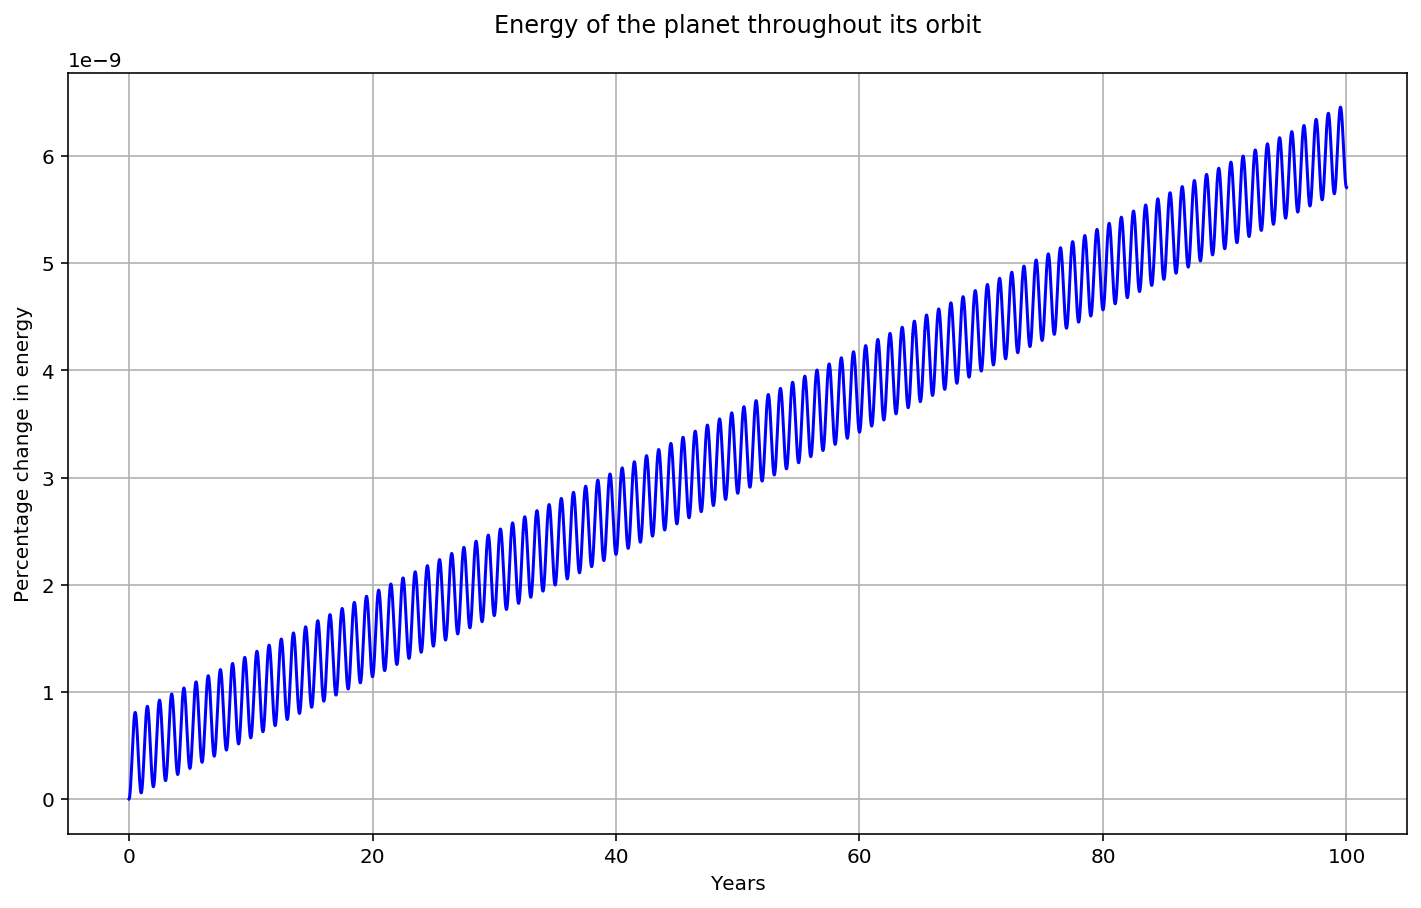

In [8]:
plt.figure()

plt.plot(timestep, energy_RK_1p_perc, color = 'b') # Plots the percentage change in energy over time
plt.xlabel('Years')
plt.ylabel('Percentage change in energy')
plt.title('Energy of the planet throughout its orbit\n')

plt.grid()
plt.show()

The percentage change in the Earth's angular momentum was also plotted as shown below. The same reasoning as the energy plot above was applied here and the percentage change was plotted than the raw values of angular momentum. Again, this choice allows the progression of the orbit over time to be shown.

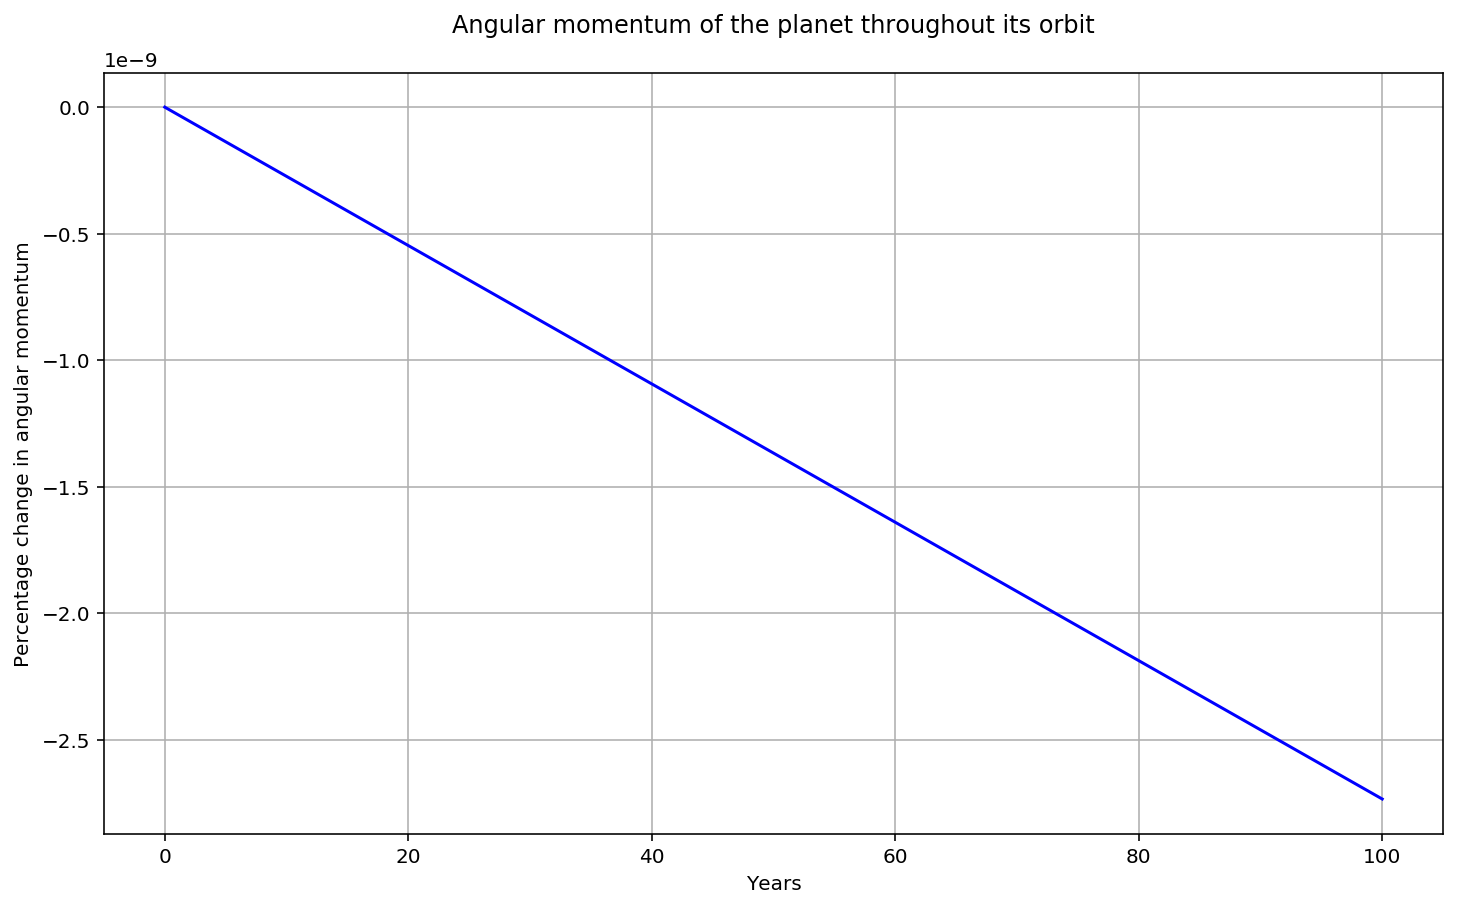

In [9]:
plt.figure()

plt.plot(timestep, ang_mom_RK_1p_perc, color = 'b') # Plots the percentage change in angular momentum over time
plt.xlabel('Years')
plt.ylabel('Percentage change in angular momentum')
plt.title('Angular momentum of the planet throughout its orbit\n')

plt.grid()
plt.show()

### 2.3. Modelling the orbits of Mercury and the Earth around the Sun

In this subsection, the setup code is written: the derivative function, and energy and angular momentum functions are defined. These functions will be used for all three integration methods and, so are defined earlier. Additionally, the planets' initial states are set. This includes the x and y components of the planets' initial position and velocity.

In [10]:
# New derivative function to factor in the distance between the two planets and its effect on the position overall
def s1_p2(t, state_current):
    rad1 = np.array([state_current[0], state_current[1]])
    rad2 = np.array([state_current[4], state_current[5]])
    rad21 = rad2 - rad1

    mag_rad1 = np.sqrt(rad1.dot(rad1))
    mag_rad2 = np.sqrt(rad2.dot(rad2))
    mag_rad21 = np.sqrt(rad21.dot(rad21))

    a1 = -((Gm_star * rad1) / (mag_rad1 ** 3)) + ((G * m_2 * rad21) / (mag_rad21 ** 3))
    a2 = -((Gm_star * rad2) / (mag_rad2 ** 3)) + ((G * m_1 * rad21) / (mag_rad21 ** 3))

    return np.array([state_current[2], state_current[3], a1[0], a1[1], state_current[6], state_current[7], a2[0], a2[1]])

# New energy function as it is total energy of both planets
def energy_2p(state_current):
    rad1 = np.array([state_current[0], state_current[1]])
    rad2 = np.array([state_current[4], state_current[5]])
    rad21 = rad2 - rad1

    mag_rad1 = np.sqrt(rad1.dot(rad1))
    mag_rad2 = np.sqrt(rad2.dot(rad2))
    mag_rad21 = np.sqrt(rad21.dot(rad21))

    vel1_sq = (state_current[2] ** 2) + (state_current[3] ** 2)
    vel2_sq = (state_current[6] ** 2) + (state_current[7] ** 2)

    energy = (((m_1 * vel1_sq) + (m_2 * vel2_sq)) / 2) - (Gm_star * ((m_1 / mag_rad1) + (m_2 / mag_rad2)) + ((m_1 * m_2) / mag_rad21))

    return energy

# Like the energy, a new function is needed for the total angular momentum
def ang_mom_2p(state_current):
    ang_mom1 = m_1 * ((state_current[0] * state_current[3]) - (state_current[1] * state_current[2]))
    ang_mom2 = m_2 * ((state_current[4] * state_current[7]) - (state_current[5] * state_current[6]))
    tot_mom = ang_mom1 + ang_mom2

    return tot_mom

Below, the distances 'x1', 'y1', 'x2', and 'y2' are expressed in astronomical units (AU). Then 'vy1' and 'vy2' (the y components of the Earth's and Mercury's velocities) are derived from these distances. [4]

In [11]:
# State form: [x1, y1, vx1, vy1, x2, y2, vx2, vy2]
# Plotting using initial conditions of Mercury and the Earth around the Sun
state_initial_2p = np.array([1, 0, 0, np.sqrt(Gm_star / 1), 0.39, 0, 0, np.sqrt(Gm_star / 0.39)])

state_RK_2p = np.ndarray((1, 8), np.float)
for i in range(8):
    state_RK_2p[0, i] = state_initial_2p[i]

#### 2.3.1. Using the RK4 integration method

For all uses of the RK4 and ode integration methods, when calculating the percentage change in energy and angular momentum, the variable 'i' is multiplied by 500 in the for loop (resulting in the temporary variable 'j'). This is to ensure that 'j' is always an integer so it can be used as in index so it can be used in the lists below it. To remove the decimal from 'j' (it, like 'i', is a float), the int() function is used when using 'j' as an index.

In [12]:
t = 0 # Reset t to zero

while (t < t_tot):
    state_RK_2p = np.append(state_RK_2p, [RK4_func(t, state_RK_2p[-1,:], s1_p2, dt)], axis = 0)
    t += dt

# Splits the postion and velocity arrays into 4 separate arrays (a position and a velocity array for both planets)
xy_RK4_2p = np.array([state_RK_2p[0:, 0], state_RK_2p[0:, 1]])
xy2_RK4_2p = np.array([state_RK_2p[0:, 4], state_RK_2p[0:, 5]])

v1_RK4_2p = np.array([state_RK_2p[0:, 2], state_RK_2p[0:, 3]])
v2_RK4_2p = np.array([state_RK_2p[0:, 6], state_RK_2p[0:, 7]])

energy_initial_2p = energy_2p(state_RK_2p[0, :]) # Initial energy to calculate the percentage change in total energy

# Empty list for the percentage change in total energy
energy_RK_2p_perc = []

ang_mom_initial_2p = ang_mom_2p(state_RK_2p[0, :]) # Initial value of the total angular momentum to calculate the percentage change

# Empty list for the percentage change in total angular momentum
ang_mom_RK_2p_perc = []

for i in np.arange(0, t_tot, dt):
    j = i * 500 # Multipy by 500 to get an integer to use as the index

    energy_RK_2p_perc.append((energy_2p(state_RK_2p[int(j), :]) - energy_initial_2p) / energy_initial_2p) # Percentage change between new and initial energy

    ang_mom_RK_2p_perc.append((ang_mom_2p(state_RK_2p[int(j), :]) - ang_mom_initial_2p) / ang_mom_initial_2p) # Percentage change from initial to new angular momentum

#### 2.3.2. Using the ode integration method

The ode integration method uses a similar form to the RK4 integration method; however, an ODE 'object' needs to be created first and this object's integrate method needs to be called repeatedly [7]. This arises from the fact that scipy.integrate.ode is much more low-level (compared to scipy.integrate.odeint which is used next) so, unlike odeint, it cannot just call a single function to integrate. Although this does give the ode solver a greater amount of options in contrast to odeint.

In [13]:
ode_obj_2p = ode(s1_p2)
ode_obj_2p.set_initial_value(state_initial_2p)

ode_states_2p = [state_initial_2p] # Creates a list of states with the initial state as the first component
times = np.arange(0, t_tot, dt) # Creates a range of times to run through

for t in times[1:]:
    ode_obj_2p.integrate(ode_obj_2p.t+dt) # Integrates the current state
    ode_states_2p.append(ode_obj_2p.y) # Appends the new state to the list of states

ode_states_2p = np.array(ode_states_2p) # Converts the list of states into an array

# Splits the postion and velocity arrays into 4 separate arrays (a position and a velocity array for both planets)
ode_xy1_2p = np.array([ode_states_2p[:, 0], ode_states_2p[0:, 1]])
ode_xy2_2p = np.array([ode_states_2p[:, 4], ode_states_2p[0:, 5]])

ode_vel1_2p = np.array([ode_states_2p[:, 2], ode_states_2p[0:, 3]])
ode_vel2_2p = np.array([ode_states_2p[:, 6], ode_states_2p[0:, 7]])


energy_2p_initial = energy_2p(ode_states_2p[0, :])# Initial energy to calculate the percentage change in total energy

# Empty list for the percentage change in total energy
ode_energy_2p_perc = []

ang_mom_2p_initial = ang_mom_2p(ode_states_2p[0, :]) # Initial value of the total angular momentum to calculate the percentage change

# Empty list for the percentage change in total angular momentum
ode_ang_mom_2p_perc = []

for i in np.arange(0, t_tot, dt):
    j = i * 500 # Multipy by 500 to get an integer to use as the index

    ode_energy_2p_perc.append((energy_2p(ode_states_2p[int(j), :]) - energy_2p_initial) / energy_2p_initial) # Percentage change between new and initial energy

    ode_ang_mom_2p_perc.append((ang_mom_2p(ode_states_2p[int(j), :]) - ang_mom_2p_initial) / ang_mom_2p_initial) # Percentage change from initial to new angular momentum

#### 2.3.3. Using the odeint integration method

Here, the order of inputs for the derivative function ('s1_p2') is reversed compared to ode class [7], hence 'tfirst = True' is used to switch their order when they run as arguments through the function.

As stated in the comments below, this method was used with list comprehensions to add a level of compactness and greater readability to the code. This also mitigates the need of a for loop when calculating the percentage change in energy and angular momentum. Consequently, the multiplier of 500 to calculate 'j' is not needed so the variable 'step_num' from section 2.1 can be changed without having any effect on these calculations.

In [14]:
times = np.linspace(0, t_tot, int(t_tot / dt))
odeint_states = odeint(s1_p2, state_initial_2p, times, tfirst = True) # Uses odeint to solve the ordinary differential equation

# To calculate the following lists, list comprehensions were used.

odeint_energy_initial = energy_2p(odeint_states[0]) # Calculates the intial value of the total energy
odeint_energy_perc = [(energy_2p(state) - odeint_energy_initial) / odeint_energy_initial for state in odeint_states] # Uses the initial energy to calculate the percentage change in energy over the orbit

odeint_ang_mom_initial = ang_mom_2p(odeint_states[0]) # Calculates the intial value of the total angular momentum
odeint_ang_mom_perc = [(ang_mom_2p(state) - odeint_ang_mom_initial) / odeint_ang_mom_initial for state in odeint_states] # Calculates the percentge change in total angular momentum using the initial angular momentum

odeint_x1 = [state[0] for state in odeint_states] # Calculates the x-value positions for the first planet
odeint_y1 = [state[1] for state in odeint_states] # Calculates the y-value positions for the first planet

odeint_x2 = [state[4] for state in odeint_states] # Calculates the x-value positions for the second planet
odeint_y2 = [state[5] for state in odeint_states] # Calculates the y-value positions for the second planet

### 2.4. Modelling a hypothetical Earth-like planet orbiting Sun-like binary stars

For this section, the relevant data from known binary star systems was not available, so a hypothetical system was created with a planet orbiting two Sun-like stars. This helps in showing how the RK4 method and ode class can be used to create a base model for variations of differnet n-body systems (in this case, the two variations of a three-body system).

In [15]:
# Derivative function that will be integrated with the different integration methods
def s2_p1(t, state_current):
    rad1 = np.array([state_current[0], state_current[1]])
    rad2 = np.array([state_current[0] - 2, state_current[1]])

    mag_rad1 = np.sqrt(rad1.dot(rad1))
    mag_rad2 = np.sqrt(rad2.dot(rad2))

    a1 = -Gm_star * (rad1 / mag_rad1 ** 3 + rad2 / mag_rad2 ** 3)

    return np.array([state_current[2], state_current[3], a1[0], a1[1]])

# Function to calculate the energy of the planet at the current state
def energy_2s(state_current):
    rad1 = np.sqrt(state_current[0] ** 2 + state_current[1] ** 2)
    rad2 = np.sqrt((state_current[0] - 2) ** 2 + state_current[1] ** 2)

    vel1_sq = state_current[2] ** 2 + state_current[3] ** 2

    energy = ((m_1 * vel1_sq) / 2) - (Gm_star * ((m_1 / rad1) + (m_1 / rad2)))

    return energy

# Function to calculate the angular momentum of the planet at the current state
def ang_mom_2s(state_current):
    tot_mom = m_1 * ((state_current[0] * state_current[3]) - (state_current[1] * state_current[2]))

    return tot_mom

The initial positions of the planet on the xy-plane and the components of its velocity were chosen through trial and error to create a somewhat stable orbit. With this setup, a greater number of orbits are possible compared to numerous planets orbiting a single star. Again, both components of the position are in AU.

In [16]:
# State form: [x1, y1, vx1, vy1]
state_initial_2s = np.array([1.5, 1, 8, 0])

state_RK_2s = np.ndarray((1, 4), np.float)
for i in range(4):
    state_RK_2s[0, i] = state_initial_2s[i]

Both of the integration methods used in 2.4 follow the same procedure as their respective counterparts in 2.3 where the main difference is in the functions they use and how this impacts the integration calculations.

#### 2.4.1. Using the RK4 integration method

In [17]:
t = 0 # t is set to 0 at the start each time new orbits are plotted.

while (t < t_tot):
    state_RK_2s = np.append(state_RK_2s, [RK4_func(t, state_RK_2s[-1,:], s2_p1, dt)], axis = 0)
    t += dt

# Separates the state_RK_1p array into its position and velcocity arrays
xy_RK4_2s = np.array([state_RK_2s[0:, 0], state_RK_2s[0:, 1]])
v1_RK4_2s = np.array([state_RK_2s[0:, 2], state_RK_2s[0:, 3]])

energy_initial_2s = energy_2s(state_RK_2s[0, :]) # Initial energy to caclulate the percentage change in energy
energy_RK_2s_perc = [] # Empty list to store the percentage change in energy values

ang_mom_initial_2s = ang_mom_2s(state_RK_2s[0, :]) # Initial value of the angular momentum to calculate the percentage change in angular momentum
ang_mom_RK_2s_perc = [] # Empty list to store the percentage change in angular momentum

for i in np.arange(0, t_tot, dt):
    j = i * 500 # Multiply by 500 to get an integer to use as the index below

    # Calculates and appends the percentage change in eergy relative to the initial energy
    energy_RK_2s_perc.append((energy_2s(state_RK_2s[int(j), :]) - energy_initial_2s) / energy_initial_2s)

    # Like the energy above, this calculates and appends the percentage change in angular momentum
    ang_mom_RK_2s_perc.append((ang_mom_2s(state_RK_2s[int(j), :]) - ang_mom_initial_2s) / ang_mom_initial_2s)

#### 2.4.2. Using the ode integration method

In [18]:
ode_obj_2s = ode(s2_p1)
ode_obj_2s.set_initial_value(state_initial_2s)

ode_states_2s = [state_initial_2s] # Creates a list of states with the initial state as the first component

for t in times[1:]:
    ode_obj_2s.integrate(ode_obj_2s.t+dt) # Integrates the current state
    ode_states_2s.append(ode_obj_2s.y) # Appends the new state to the list of states

ode_states_2s = np.array(ode_states_2s) # Converts the list of states into an array

# Separates the state_RK_1p array into its position and velcocity arrays
ode_xy_2s = np.array([ode_states_2s[:, 0], ode_states_2s[0:, 1]])
ode_vel_2s = np.array([ode_states_2s[:, 2], ode_states_2s[0:, 3]])

energy_2s_initial = energy_2s(ode_states_2s[0, :]) # Initial energy to caclulate the percentage change in energy
ode_energy_2s_perc = [] # Empty list to store the percentage change in energy values

ang_mom_2s_initial = ang_mom_2s(ode_states_2s[0, :]) # Initial value of the angular momentum to calculate the percentage change in angular momentum
ode_ang_mom_2s_perc = [] # Empty list to store the percentage change in angular momentum

for i in np.arange(0, t_tot, dt):
    j = i * 500 # Multiply by 500 to get an integer to use as the index below

    # Calculates and appends the percentage change in energy relative to the initial energy
    ode_energy_2s_perc.append((energy_2s(ode_states_2s[int(j), :]) - energy_2s_initial) / energy_2s_initial)

    # Like the energy above, this calculates and appends the percentage change in angular momentum
    ode_ang_mom_2s_perc.append((ang_mom_2s(ode_states_2s[int(j), :]) - ang_mom_2s_initial) / ang_mom_2s_initial)

## 3. Results

This section shows all of the graphs for each integration method used in sections 2.3 and 2.4. This includes the actual plots of the orbits of Mercury and the Earth around the Sun, and graphs of the percentage change in total energy and total angular momentum in section 3.1 to accompany the code in section 2.3. Similarly, the plots in section 3.2 relate to the RK4 and ode integration methods used in section 2.4.

Additionally, the ranges for the energy and angular momentum plots are also printed; these will be used in the Discussion section when comparing the three integration methods.

### 3.1. Plotting the orbits of Mercury and the Earth around the Sun

All three subsections here include the orbits, the percentage change in total energy and the percentage change in total angular momentum after using the specified integration method in sections 2.3.1, 2.3.2 and 2.3.3.

As shown below, the planetary orbit plots generated from the different integration methods all seem exactly the same, although the main differences lie in the energy and angular momentum plots which vary by several orders of magnitude. This is the case between the three energy plots where the percentage change in energy is a hundred times greater when using the ode integration methods compared to the RK4 integration method.

#### 3.1.1. Using the RK4 integration method

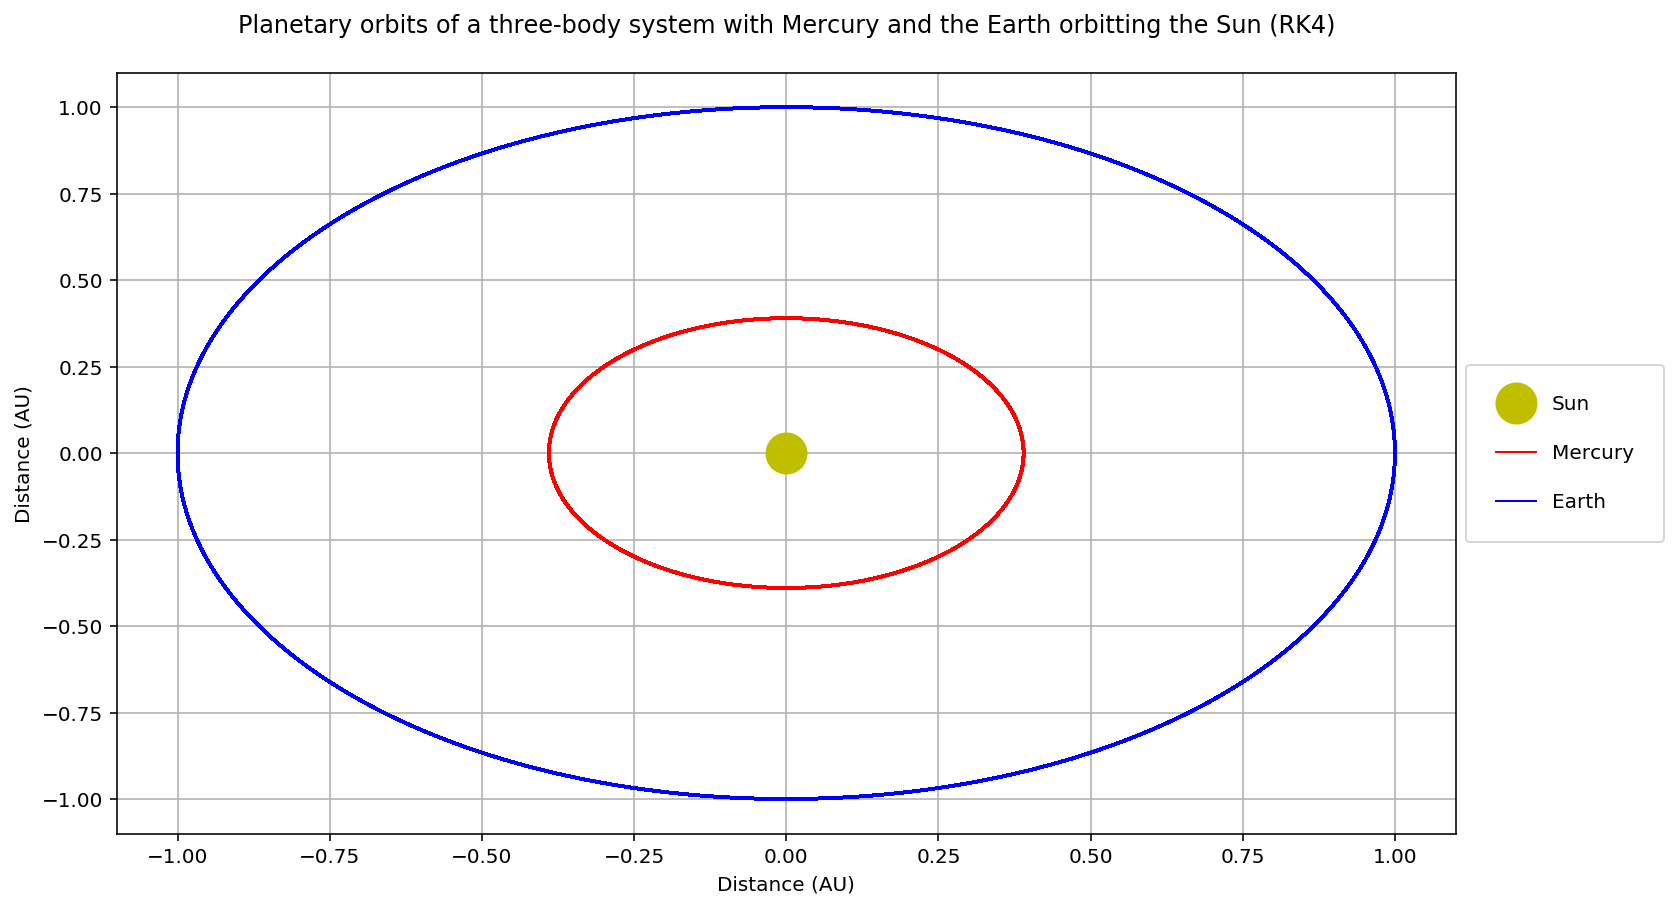

In [19]:
plt.figure()

plt.plot(0, 0, 'yo', linewidth = 2, markersize = 20, label = 'Sun') # Plots the fixed star

# The second planet is closer to the star so it is plotted first to show up higher in the legends box
plt.plot(xy2_RK4_2p[0], xy2_RK4_2p[1], color = 'r', label = 'Mercury') # Plots the orbit of the second planet
plt.plot(xy_RK4_2p[0], xy_RK4_2p[1], color = 'b', label = 'Earth') # Plots the orbit of the first planet

plt.xlabel('Distance (AU)')
plt.ylabel('Distance (AU)')
plt.title('Planetary orbits of a three-body system with Mercury and the Earth orbitting the Sun (RK4)\n')

# As before, the legends are collected and then their line widths are resized
legends = plt.legend(loc = 'center left', borderpad = 1.5, labelspacing = 1.5, bbox_to_anchor = (1, 0.5))

for leg in legends.get_lines():
    leg.set_linewidth(1)

plt.grid()
plt.show()

Initial percentage change in energy: -0.0
Final percentage change in energy: 2.998504386218195e-06


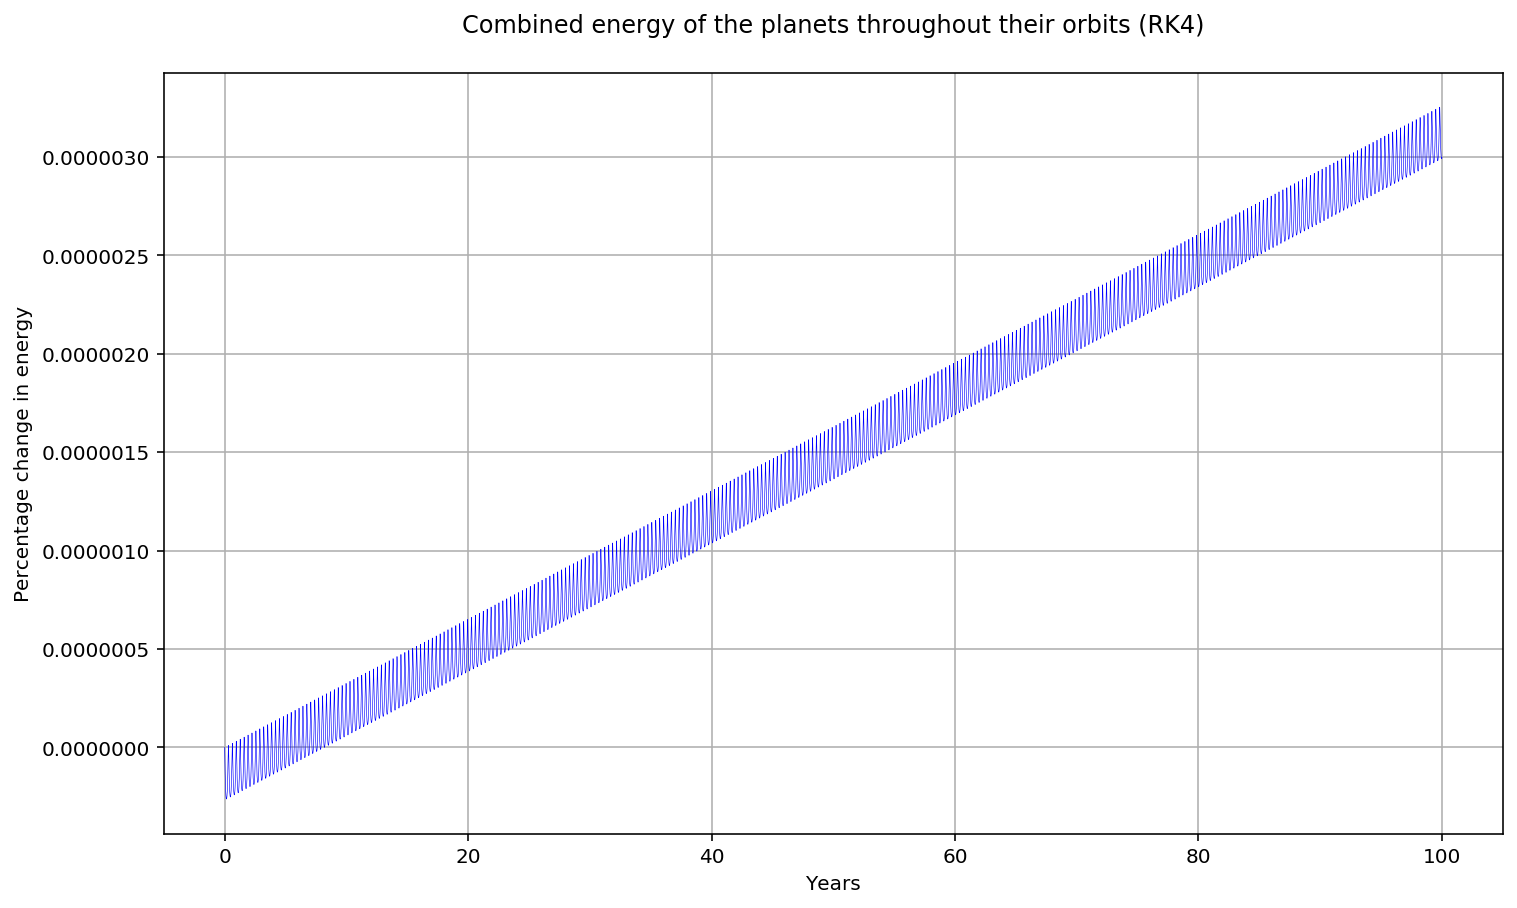

In [20]:
print("Initial percentage change in energy:", energy_RK_2p_perc[0])
print("Final percentage change in energy:", energy_RK_2p_perc[-1])

plt.figure()

plt.plot(timestep, energy_RK_2p_perc, color = 'b', linewidth = 0.3) # Plots the percentage change in total energy against time
plt.xlabel('Years')
plt.ylabel('Percentage change in energy')
plt.title('Combined energy of the planets throughout their orbits (RK4)\n')

plt.grid()
plt.show()

Initial percentage change in angular momentum: 0.0
Final percentage change in engular momentum: -4.4006143519496555e-07


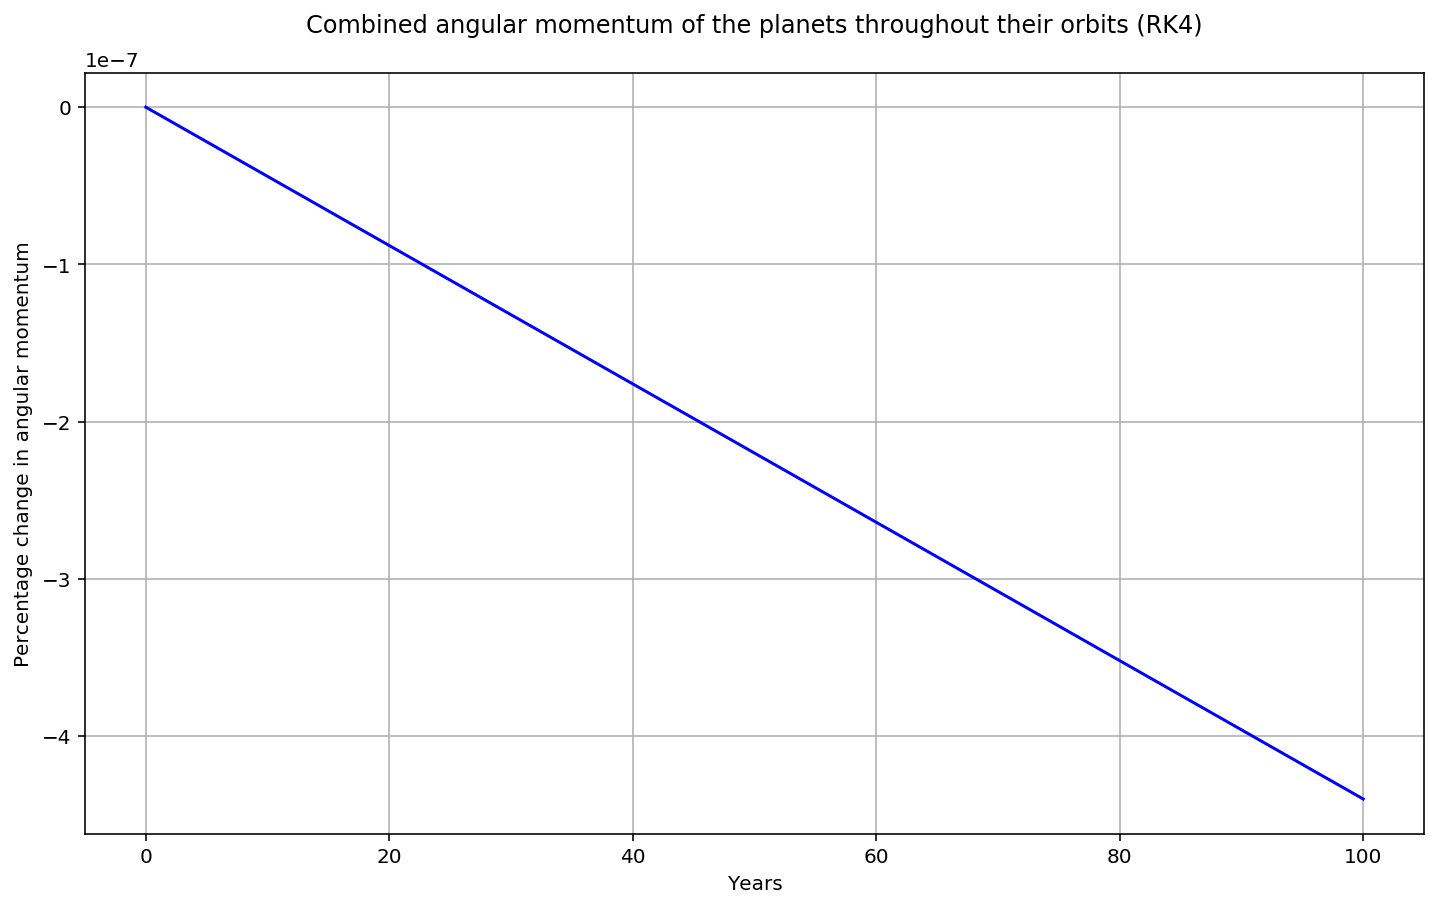

In [21]:
print("Initial percentage change in angular momentum:", ang_mom_RK_2p_perc[0])
print("Final percentage change in engular momentum:", ang_mom_RK_2p_perc[-1])

plt.figure()

plt.plot(timestep, ang_mom_RK_2p_perc, color = 'b') # Plots the percentage change in total angular momentum over time
plt.xlabel('Years')
plt.ylabel('Percentage change in angular momentum')
plt.title('Combined angular momentum of the planets throughout their orbits (RK4)\n')

plt.grid()
plt.show()

#### 3.1.2. Using the ode integration method

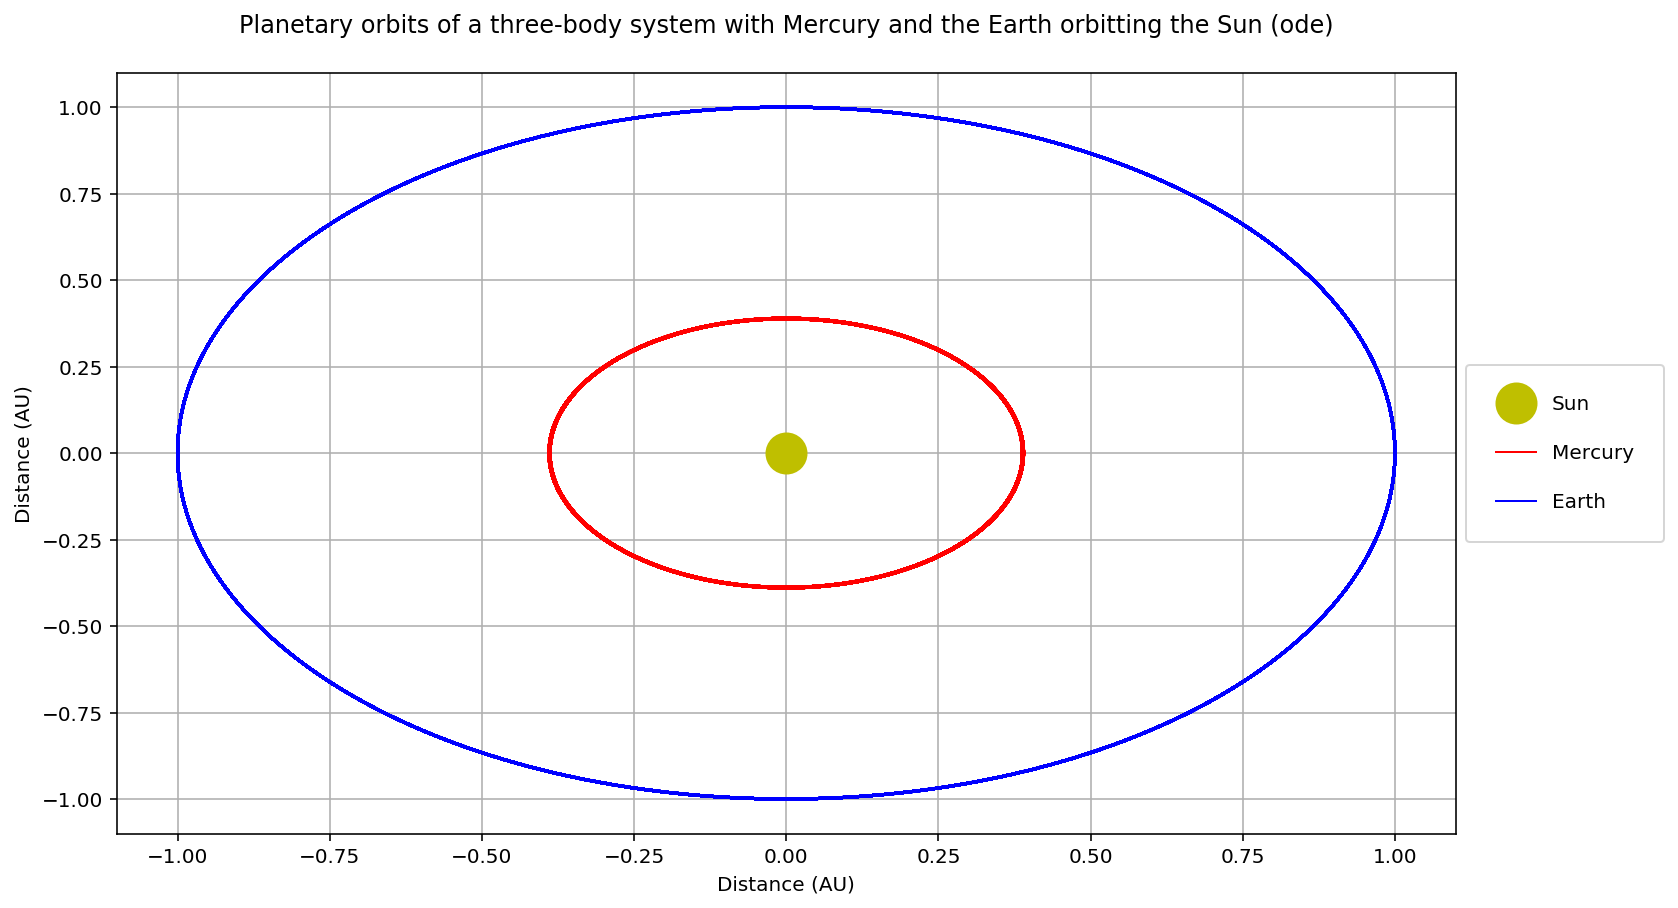

In [22]:
plt.figure()

plt.plot(0, 0, 'yo', linewidth = 2, markersize = 20, label = 'Sun') # Plots the star

# In this case, the second planet, Mercury, is closer to the Sun so plotting it first reflects this in the legends box
# The legend for Mercury comes up after the Sun but before the Earth
plt.plot(ode_xy2_2p[0], ode_xy2_2p[1], color = 'r', label = 'Mercury') # Plots the orbit of the second planet
plt.plot(ode_xy1_2p[0], ode_xy1_2p[1], color = 'b', label = 'Earth') # Plots the orbit of the first planet

plt.xlabel('Distance (AU)')
plt.ylabel('Distance (AU)')
plt.title('Planetary orbits of a three-body system with Mercury and the Earth orbitting the Sun (ode)\n')

# Collects the legends defined above
legends = plt.legend(loc = 'center left', borderpad = 1.5, labelspacing = 1.5, bbox_to_anchor = (1, 0.5))

# Runs through the legends and sets their new line widths so they match in the legends box
for leg in legends.get_lines():
    leg.set_linewidth(1)

plt.grid()
plt.show()

Initial percentage change in energy: -0.0
Final percentage change in energy: 0.0006371933564589966


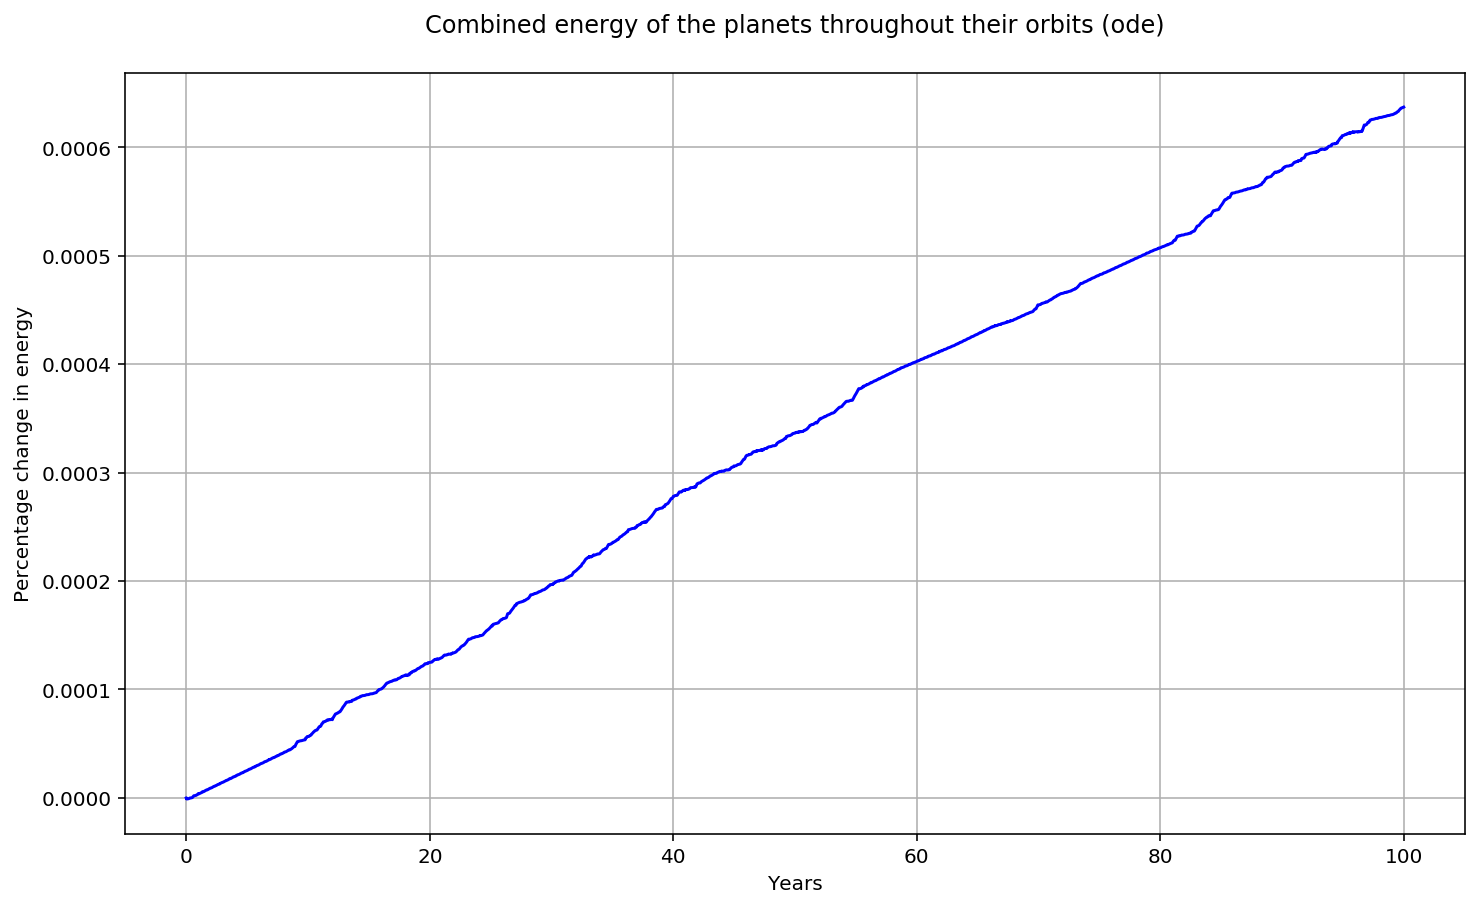

In [23]:
print("Initial percentage change in energy:", ode_energy_2p_perc[0])
print("Final percentage change in energy:", ode_energy_2p_perc[-1])

plt.figure()

plt.plot(timestep, ode_energy_2p_perc, color = 'b') # Plots the percentage change in the total energy of btih planets over time
plt.xlabel('Years')
plt.ylabel('Percentage change in energy')
plt.title('Combined energy of the planets throughout their orbits (ode)\n')

plt.grid()
plt.show()

Initial percentage change in angular momentum: 0.0
Final percentage change in angular momentum: -8.586008050691553e-05


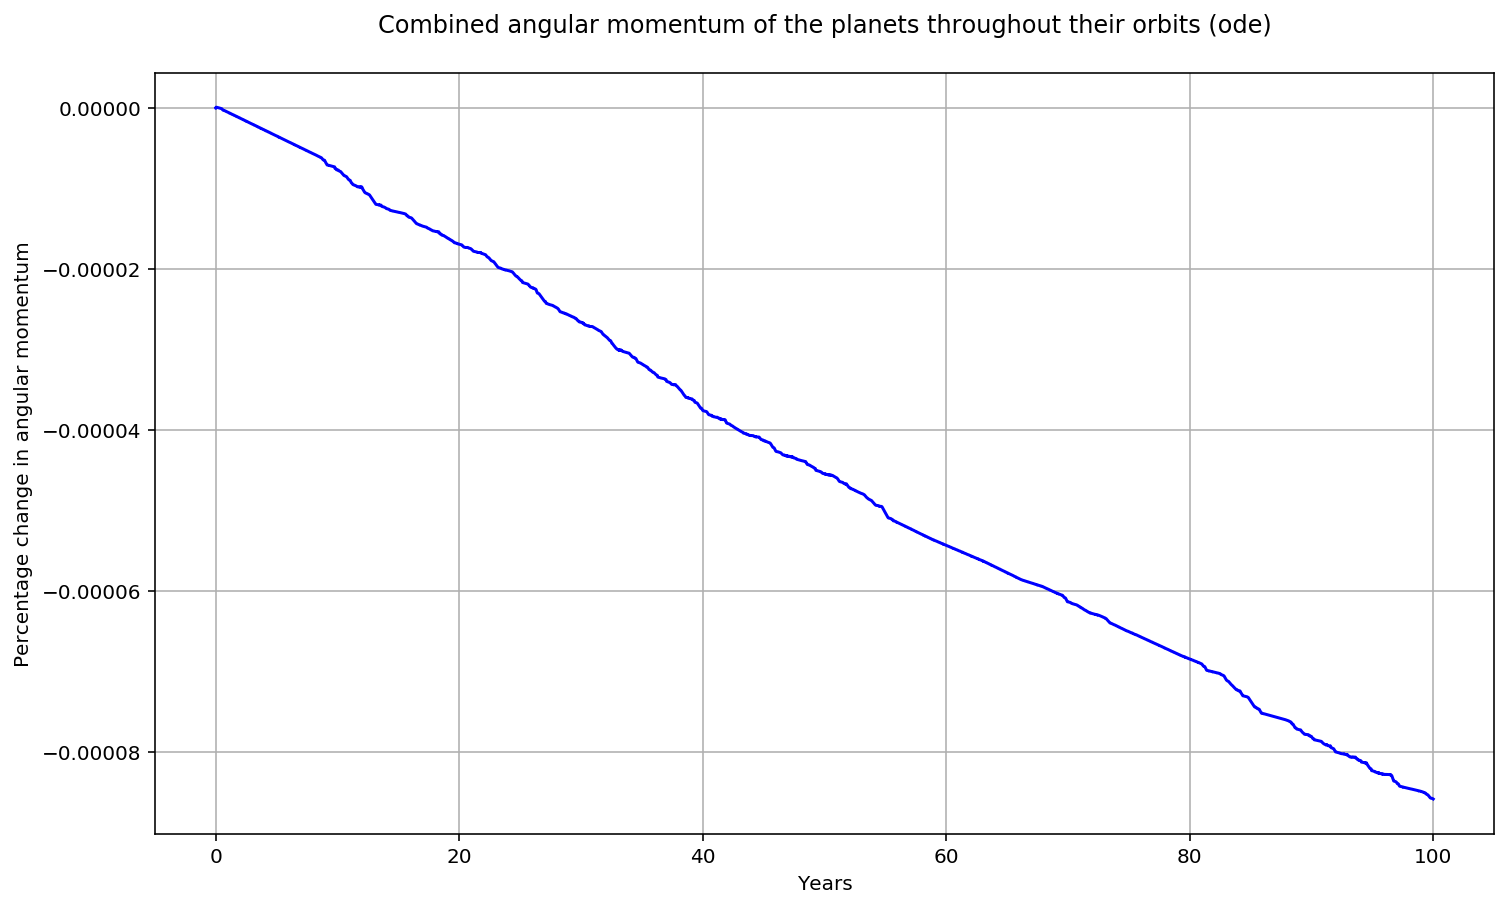

In [24]:
print("Initial percentage change in angular momentum:", ode_ang_mom_2p_perc[0])
print("Final percentage change in angular momentum:", ode_ang_mom_2p_perc[-1])

plt.figure()

plt.plot(timestep, ode_ang_mom_2p_perc, color = 'b') # Plots the percentage change in the total angular momentum of both planets over time
plt.xlabel('Years')
plt.ylabel('Percentage change in angular momentum')
plt.title('Combined angular momentum of the planets throughout their orbits (ode)\n')

plt.grid()
plt.show()

#### 3.1.3. Using the odeint integration method

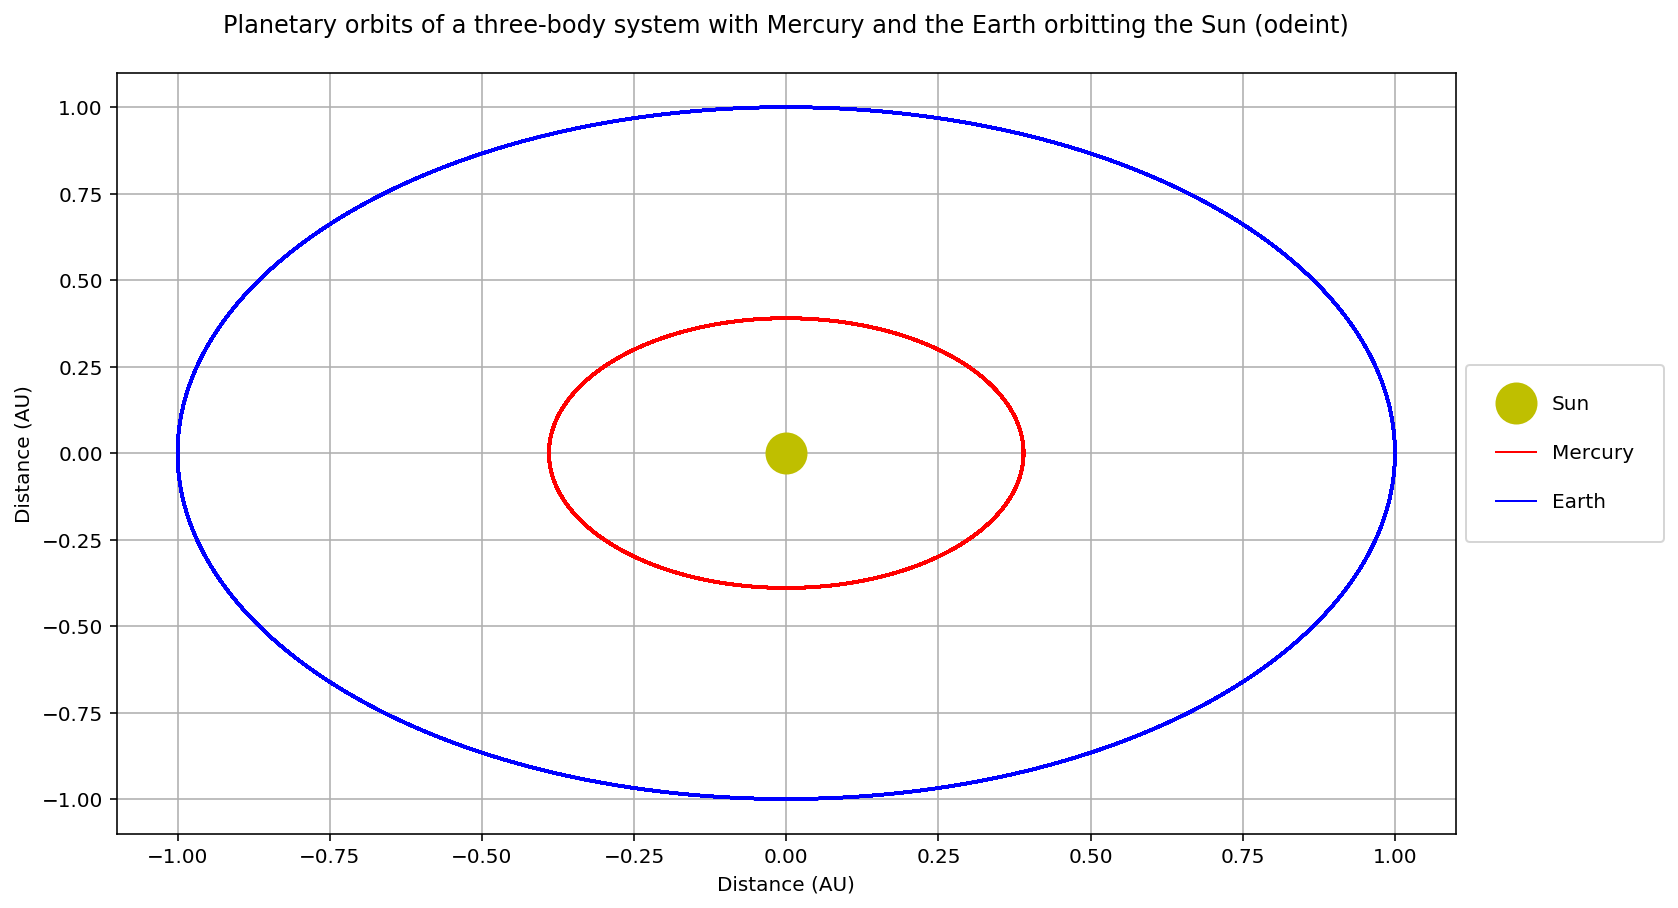

In [25]:
plt.figure()

plt.plot(0, 0, 'yo', linewidth = 2, markersize = 20, label = 'Sun') # Plots the fixed postion of the star

plt.plot(odeint_x2, odeint_y2, color = 'r', label = 'Mercury') # Plots the orbit of the second planet
plt.plot(odeint_x1, odeint_y1, color = 'b', label = 'Earth') # Plots the orbit of the first planet

plt.xlabel('Distance (AU)')
plt.ylabel('Distance (AU)')
plt.title('Planetary orbits of a three-body system with Mercury and the Earth orbitting the Sun (odeint)\n')

# Collects the legends into a single list
legends = plt.legend(loc = 'center left', borderpad = 1.5, labelspacing = 1.5, bbox_to_anchor = (1, 0.5))

# For each legend in the list above, sets the line width value to 1 (the default)
for leg in legends.get_lines():
    leg.set_linewidth(1)

plt.grid()
plt.show()

Initial percentage change in energy: -0.0
Final percentage change in energy: 5.8836328555323875e-05


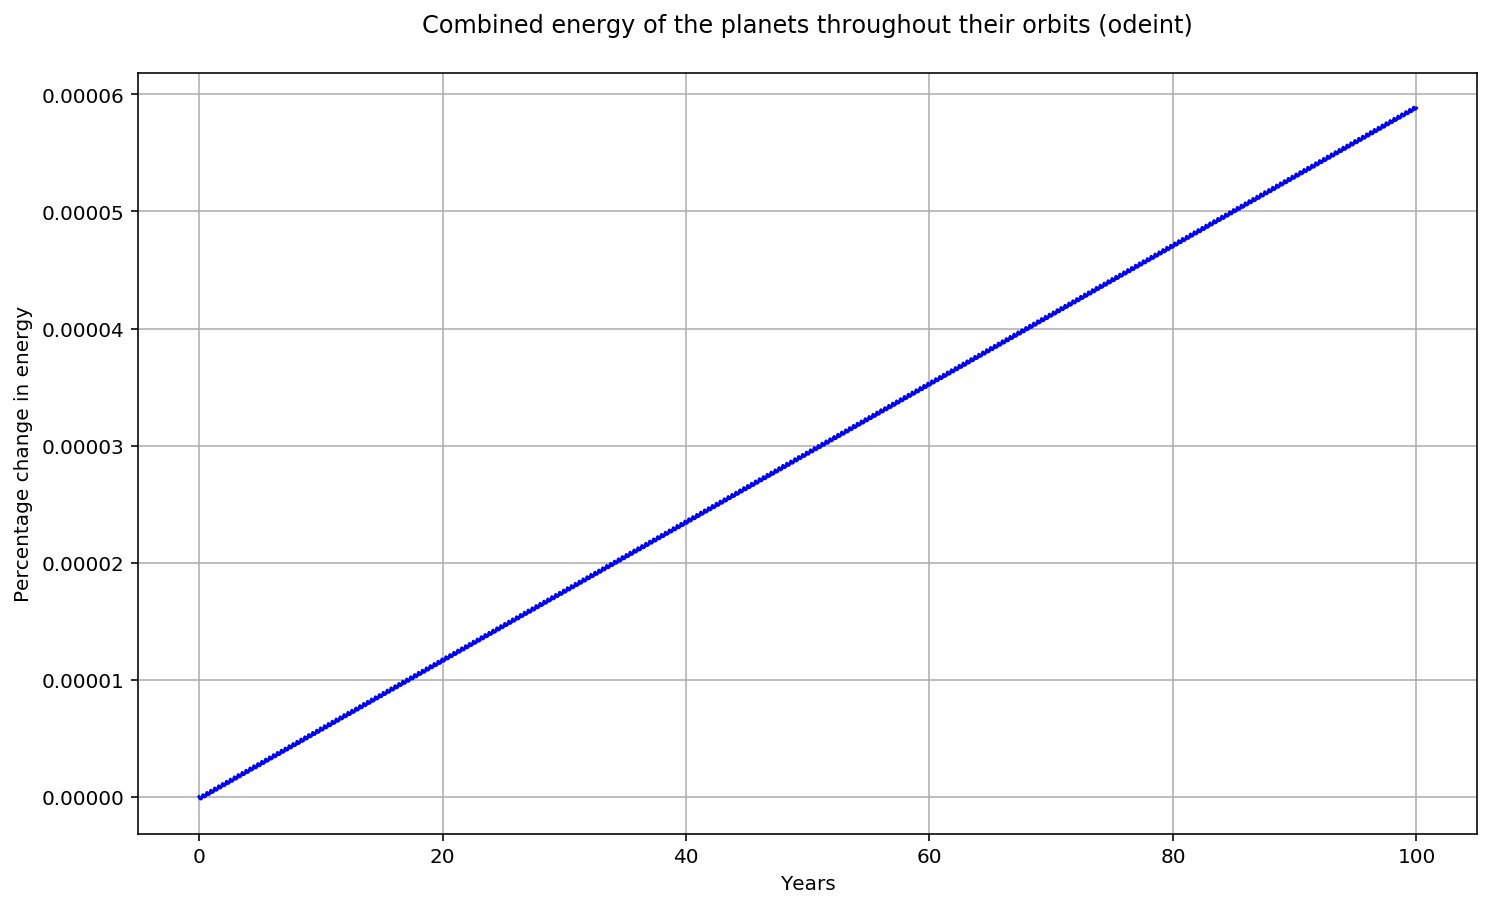

In [26]:
print("Initial percentage change in energy:", odeint_energy_perc[0])
print("Final percentage change in energy:", odeint_energy_perc[-1])

plt.figure()

plt.plot(timestep, odeint_energy_perc, color = 'b') # Plots the percentage change in the total energy of both planets over time
plt.xlabel('Years')
plt.ylabel('Percentage change in energy')
plt.title('Combined energy of the planets throughout their orbits (odeint)\n')

plt.grid()
plt.show()

Initial percentage change in angular momentum: 0.0
Final percentage change in angular momentum: -7.97061679757594e-06


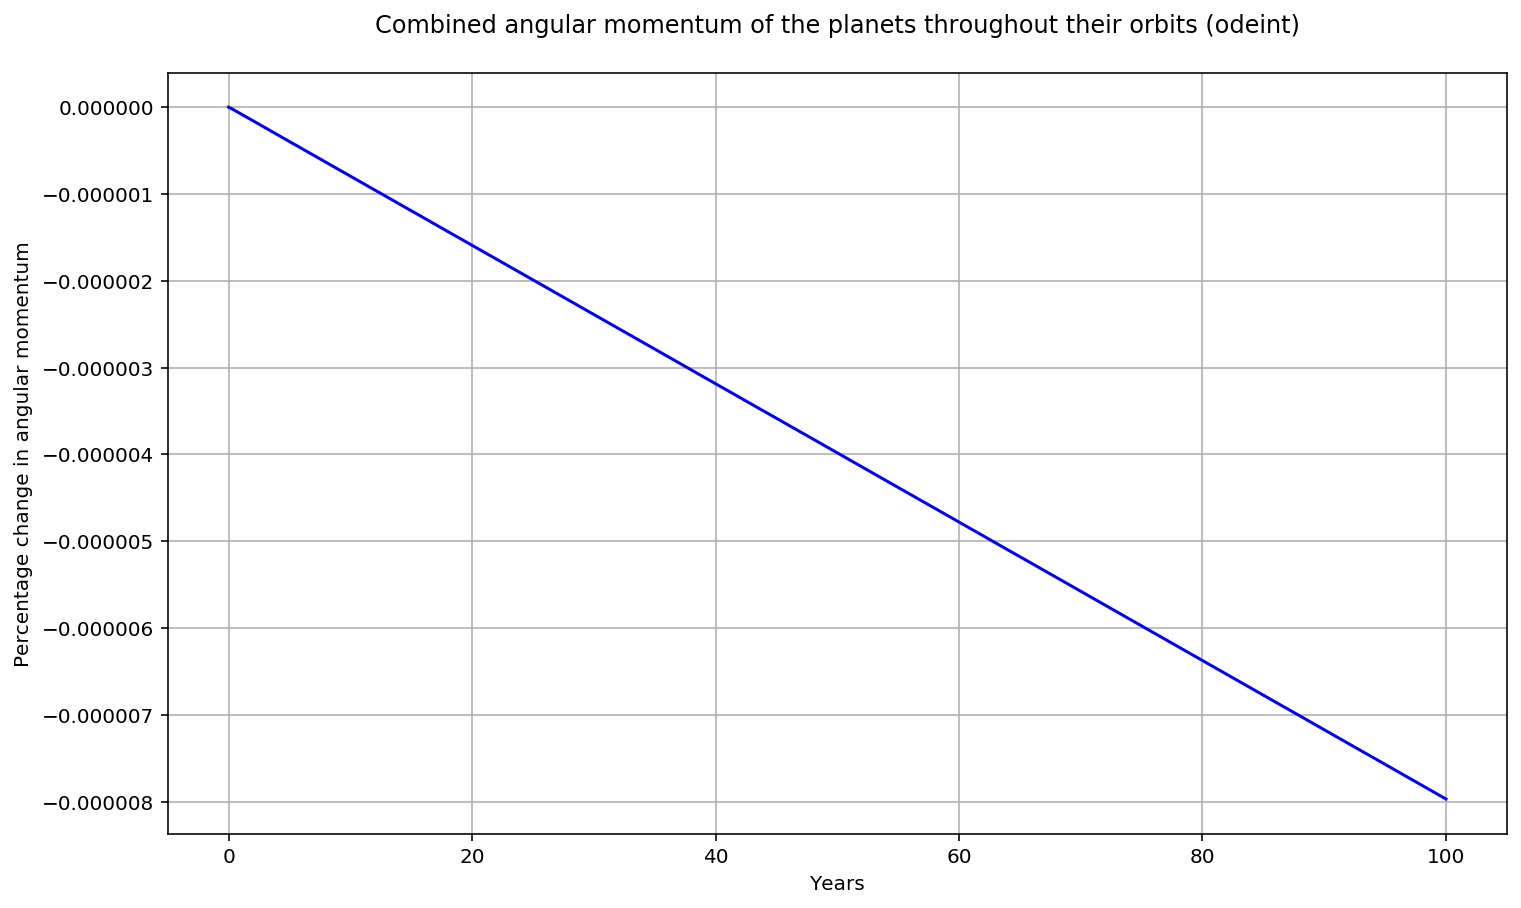

In [27]:
print("Initial percentage change in angular momentum:", odeint_ang_mom_perc[0])
print("Final percentage change in angular momentum:", odeint_ang_mom_perc[-1])

plt.figure()

plt.plot(timestep, odeint_ang_mom_perc, color = 'b') # Plots the percentage change in the total angular momentum of both planets over time
plt.xlabel('Years')
plt.ylabel('Percentage change in angular momentum')
plt.title('Combined angular momentum of the planets throughout their orbits (odeint)\n')

plt.grid()
plt.show()

### 3.2. Plotting a hypothetical Earth-like planet orbiting Sun-like binary stars

#### 3.2.1. Using the RK4 integration method

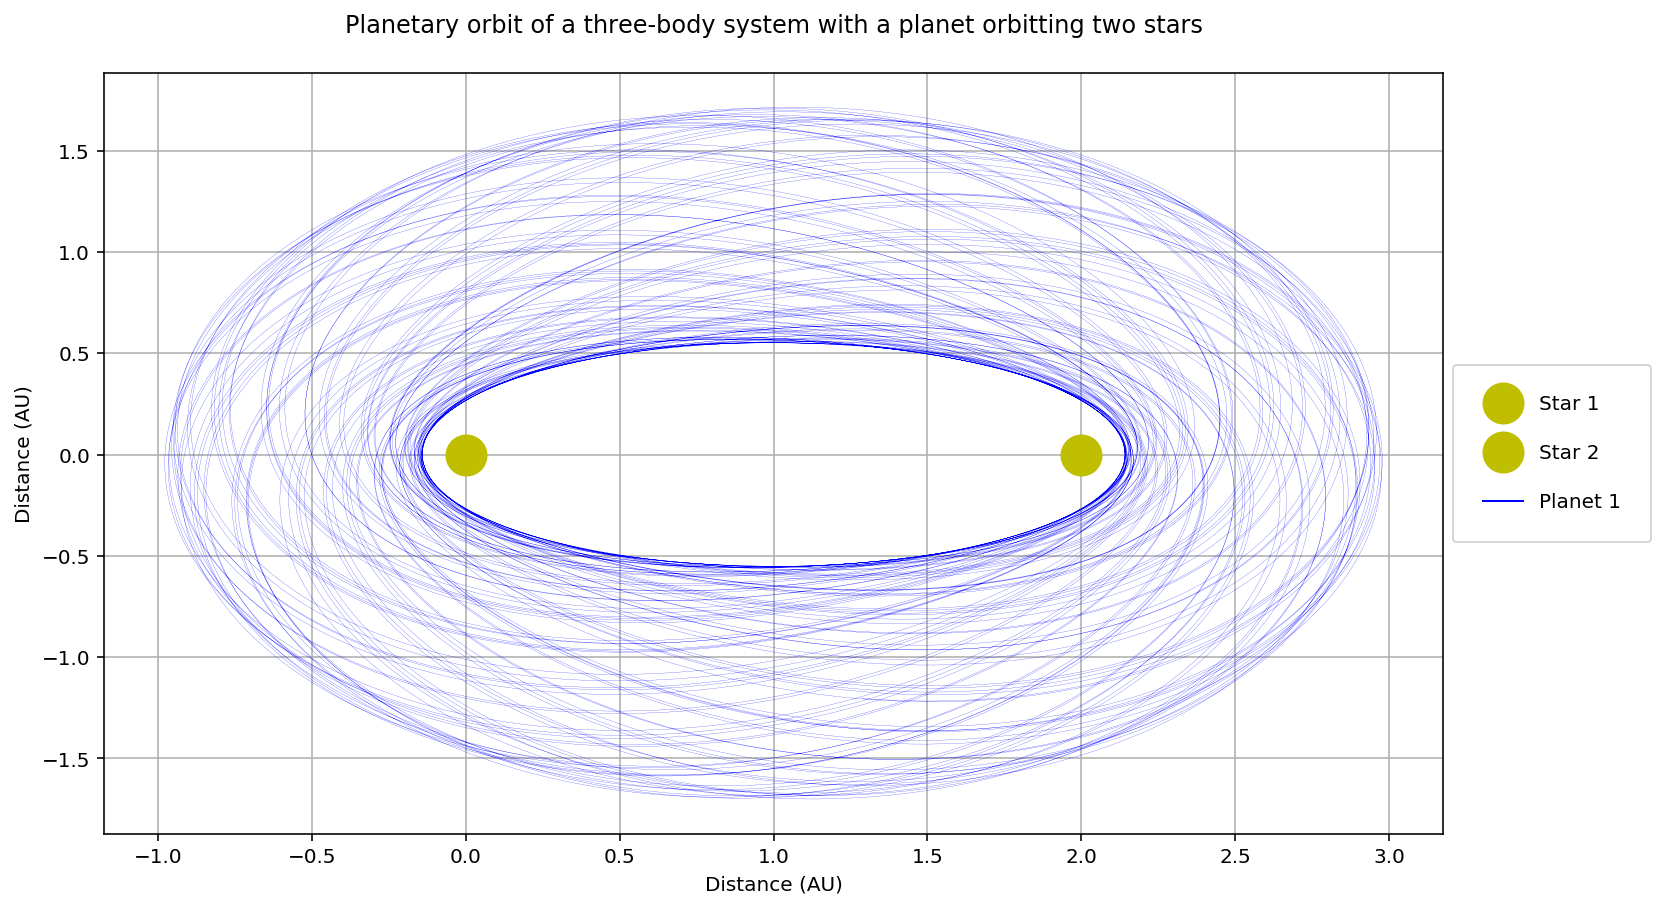

In [28]:
plt.figure()

# The two stars are both Sun-like, so this is reflected in their colour and size
plt.plot(0, 0, 'yo', linewidth = 2, markersize = 20, label = 'Star 1') # Plots the first star
plt.plot(2, 0, 'yo', linewidth = 2, markersize = 20, label = 'Star 2') # Plots the second star

plt.plot(xy_RK4_2s[0], xy_RK4_2s[1], color = 'b', linewidth = 0.1, label = 'Planet 1') # Plots the orbit of the planet

plt.xlabel('Distance (AU)')
plt.ylabel('Distance (AU)')
plt.title('Planetary orbit of a three-body system with a planet orbitting two stars\n')

# Collects the legends into a single list
legends = plt.legend(loc = 'center left', borderpad = 1.5, labelspacing = 1.5, bbox_to_anchor = (1, 0.5))

# For each legend in the list above, sets the line width value to 1 (the default)
for leg in legends.get_lines():
    leg.set_linewidth(1)

plt.grid()
plt.show()

Initial percentage change in energy: -0.0
Maximum percentage change in energy: 0.015455412725695847


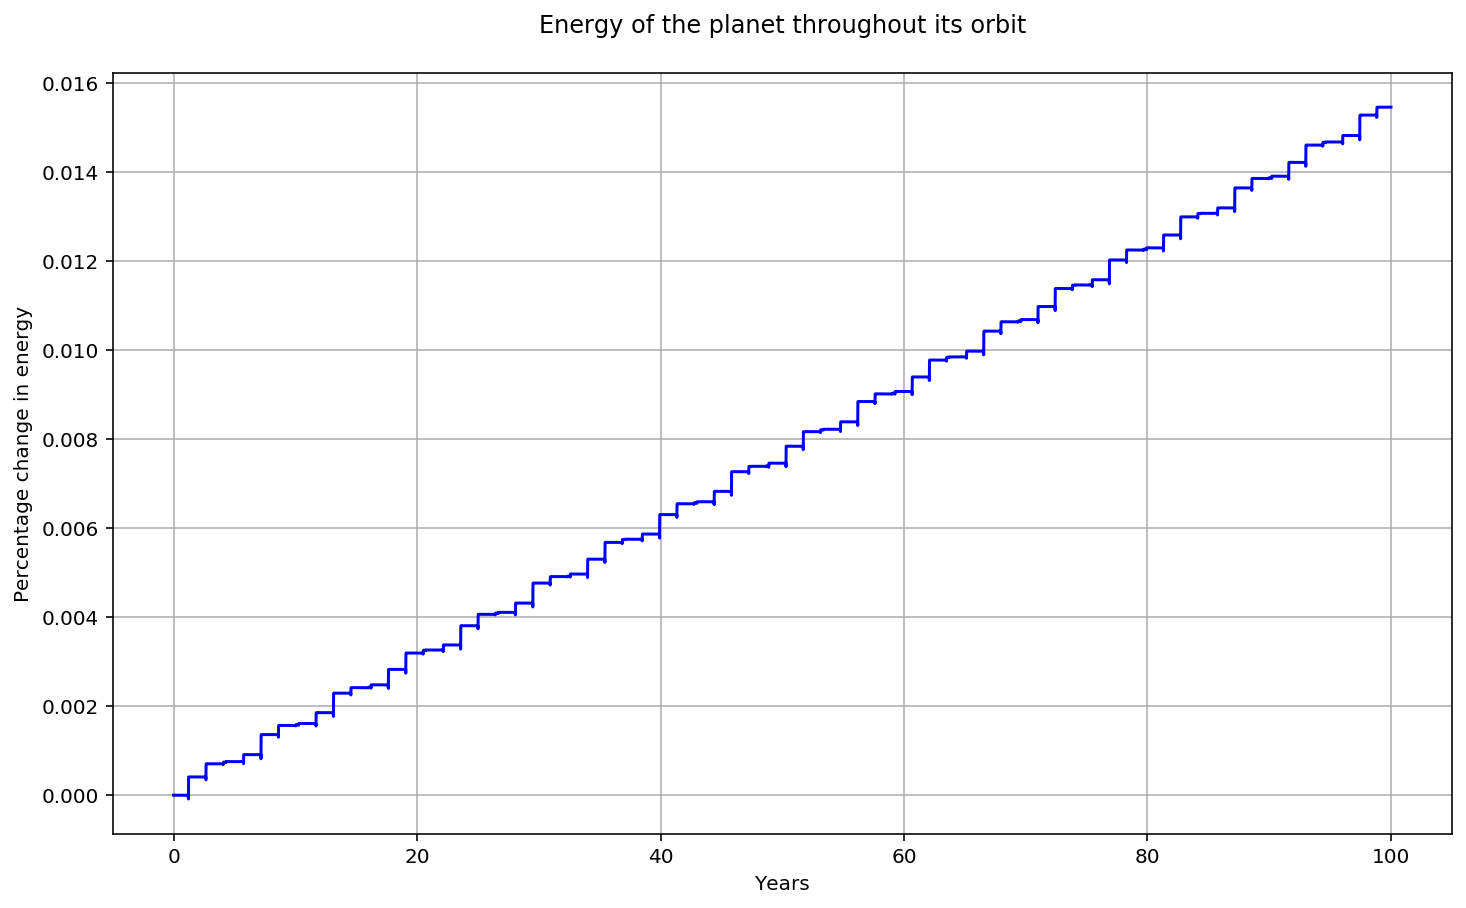

In [29]:
print("Initial percentage change in energy:", energy_RK_2s_perc[0])
print("Maximum percentage change in energy:", max(energy_RK_2s_perc))

plt.figure()

plt.plot(timestep, energy_RK_2s_perc, color = 'b') # Plots the percentage change in energy over time
plt.xlabel('Years')
plt.ylabel('Percentage change in energy')
plt.title('Energy of the planet throughout its orbit\n')

plt.grid()
plt.show()

Initial percentage change in angular momentum: -0.0
Maximum percentage change in angular momentum: 5.229557415722403


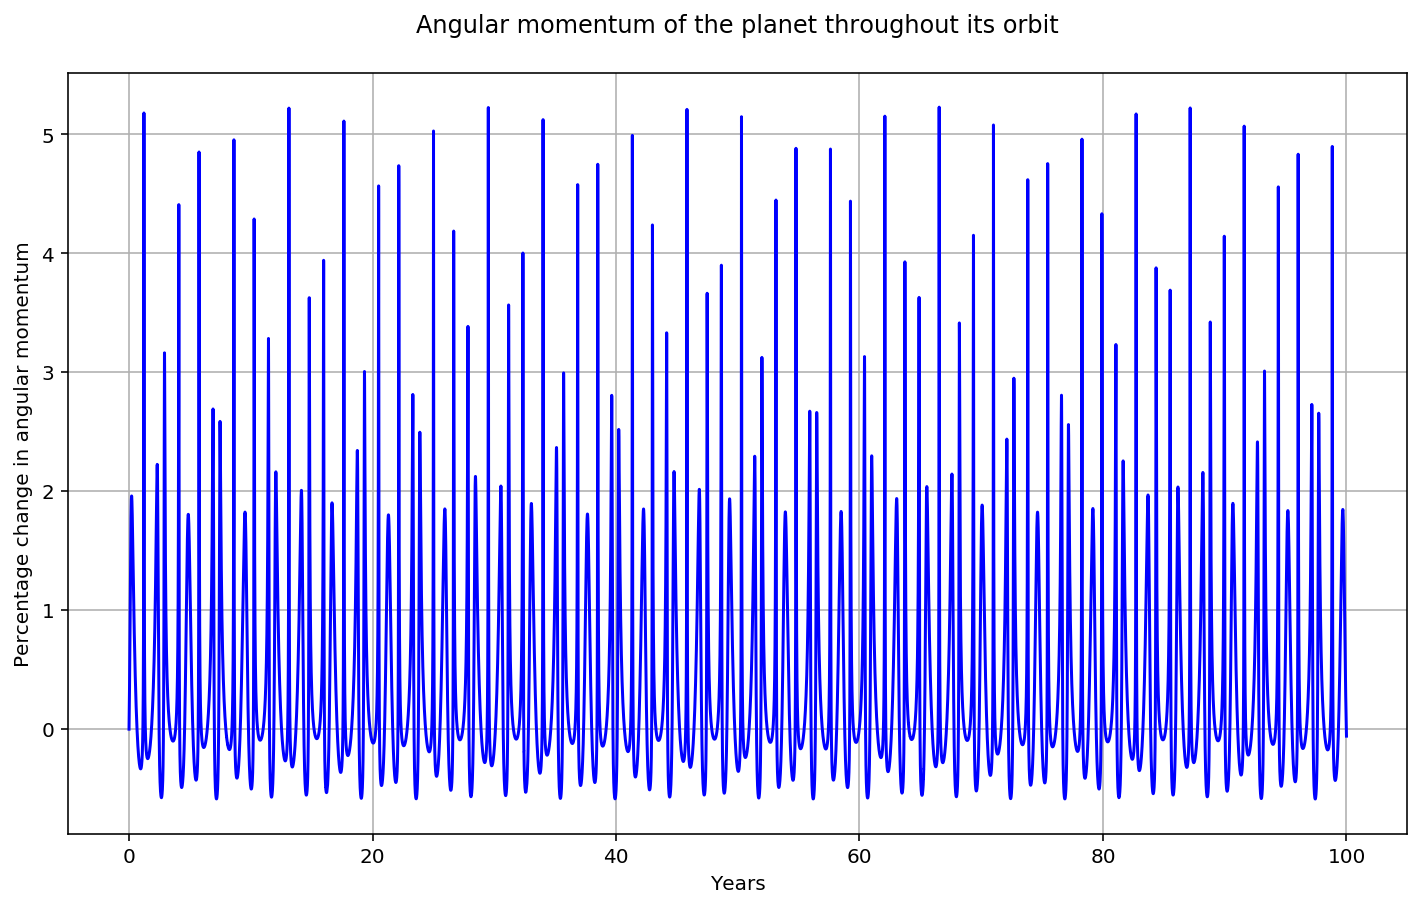

In [30]:
print("Initial percentage change in angular momentum:", ang_mom_RK_2s_perc[0])
print("Maximum percentage change in angular momentum:", max(ang_mom_RK_2s_perc))

plt.figure()

plt.plot(timestep, ang_mom_RK_2s_perc, color = 'b') # Plots the percentage change in angular momentum over time
plt.xlabel('Years')
plt.ylabel('Percentage change in angular momentum')
plt.title('Angular momentum of the planet throughout its orbit\n')

plt.grid()
plt.show()

#### 3.2.2. Using the ode integration method

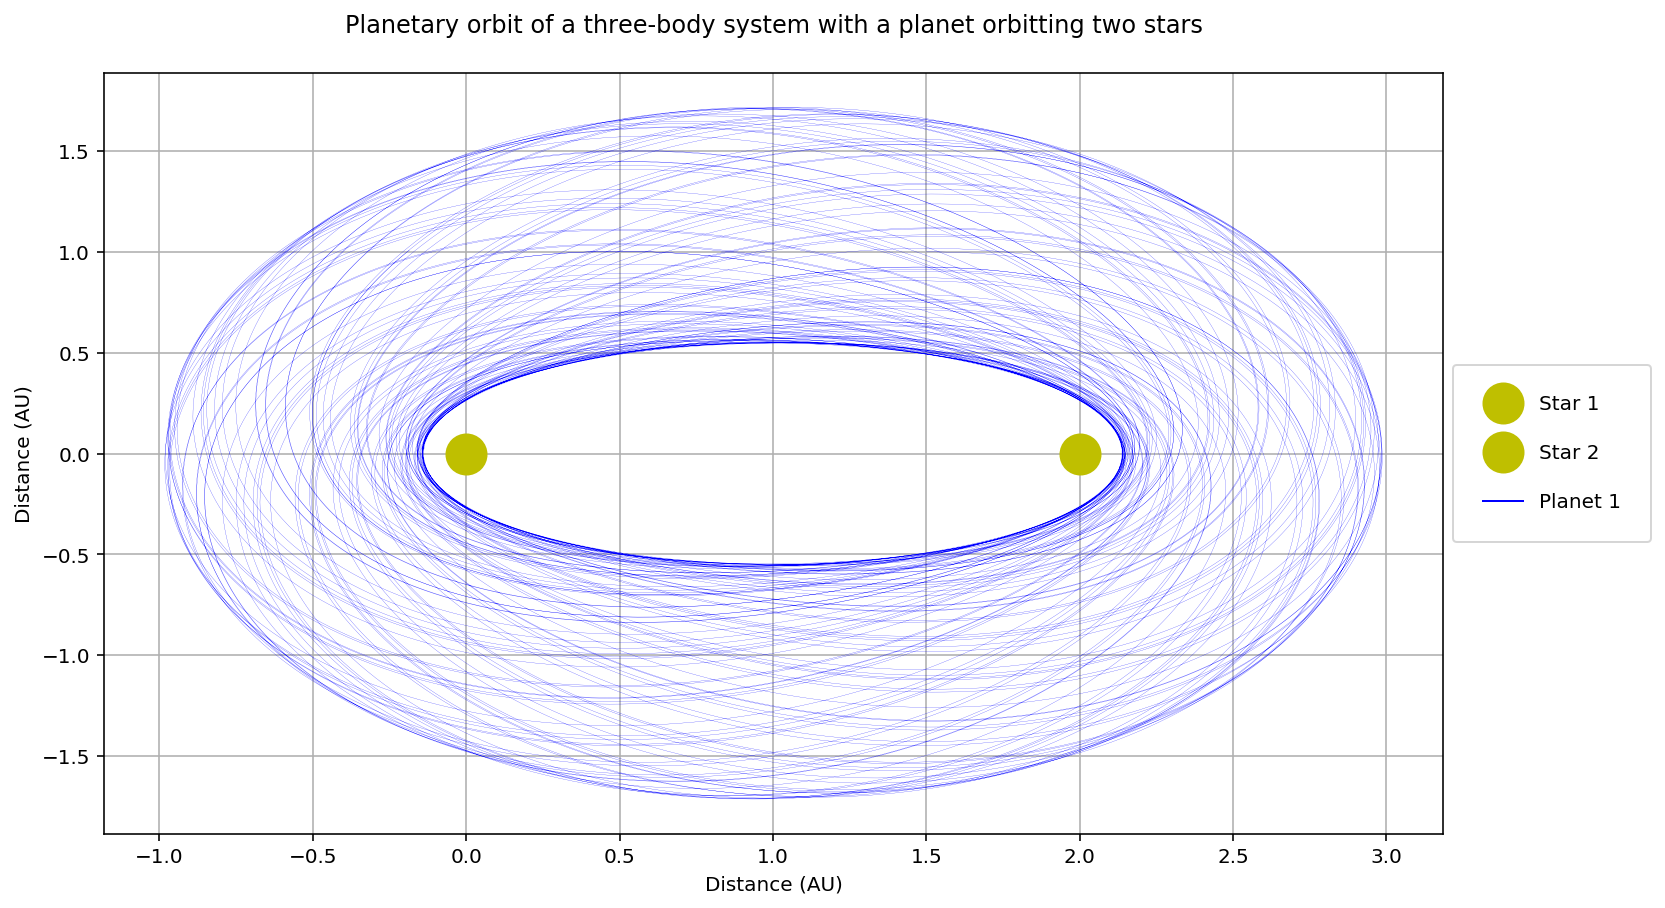

In [31]:
plt.figure()

# The two stars are both Sun-like, so this is reflected in their colour and size
plt.plot(0, 0, 'yo', linewidth = 2, markersize = 20, label = 'Star 1') # Plots the first star
plt.plot(2, 0, 'yo', linewidth = 2, markersize = 20, label = 'Star 2') # Plot the second star

plt.plot(ode_xy_2s[0], ode_xy_2s[1], color = 'b', linewidth = 0.1, label = 'Planet 1') # Plots the orbit of the planet

plt.xlabel('Distance (AU)')
plt.ylabel('Distance (AU)')
plt.title('Planetary orbit of a three-body system with a planet orbitting two stars\n')

# Collects the legends into a single list
legends = plt.legend(loc = 'center left', borderpad = 1.5, labelspacing = 1.5, bbox_to_anchor = (1, 0.5))

# For each legend in the list above, sets the line width value to 1 (the default)
for leg in legends.get_lines():
    leg.set_linewidth(1)

plt.grid()
plt.show()

Initial percentage change in energy: -0.0
Maximum percentage change in energy: 0.00470824622514655


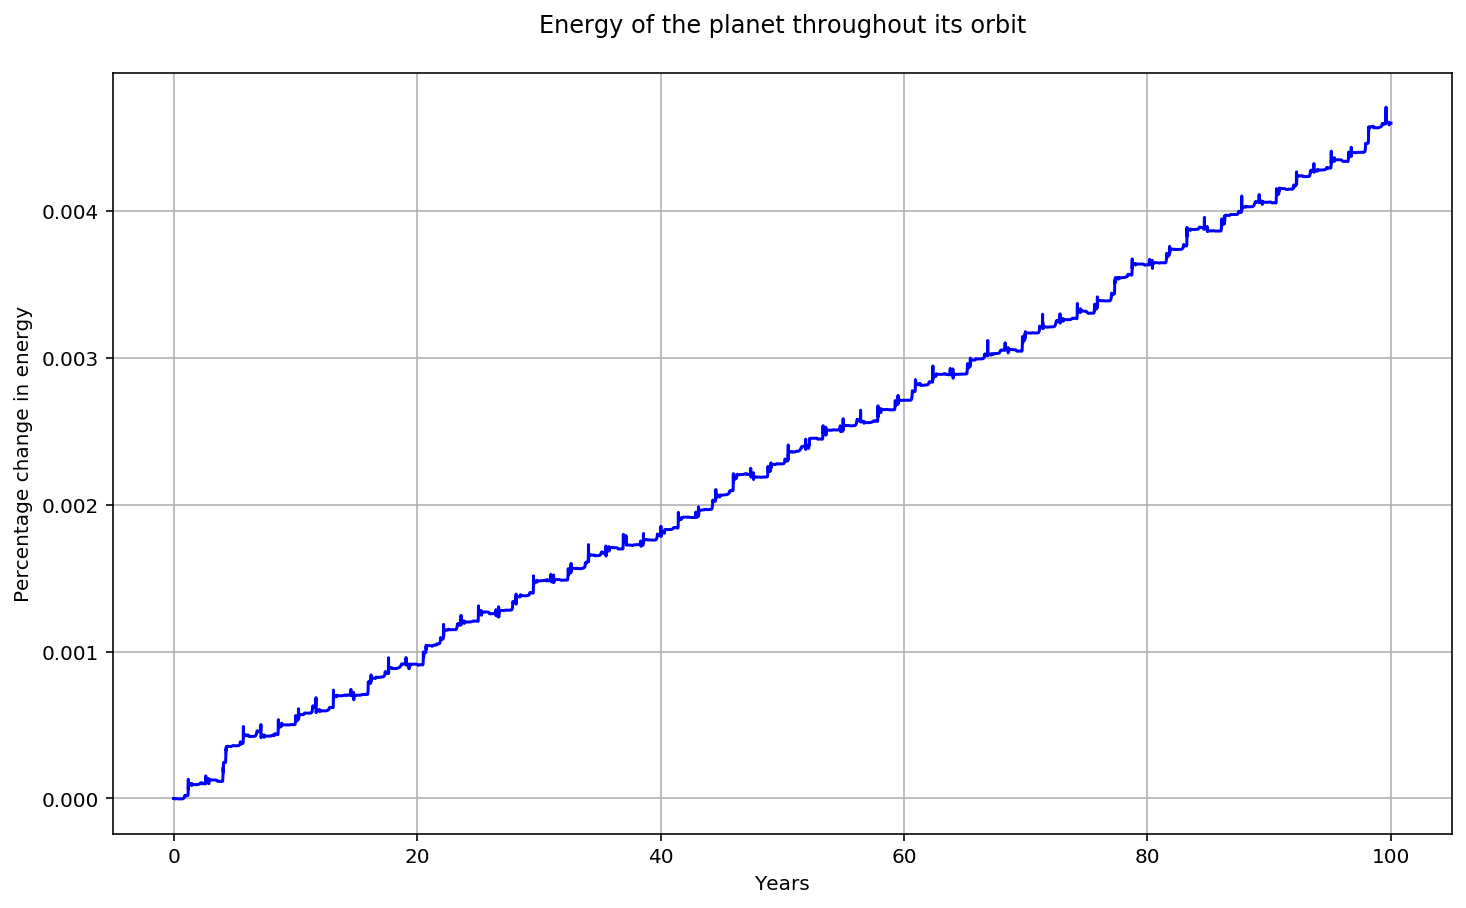

In [32]:
print("Initial percentage change in energy:", ode_energy_2s_perc[0])
print("Maximum percentage change in energy:", max(ode_energy_2s_perc))

plt.figure()

plt.plot(timestep, ode_energy_2s_perc, color = 'b') # Plots the percentage change in energy over time
plt.xlabel('Years')
plt.ylabel('Percentage change in energy')
plt.title('Energy of the planet throughout its orbit\n')

plt.grid()
plt.show()

Initial percentage change in angular momentum: -0.0
Maximum percentage change in angular momentum: 5.262972024611587


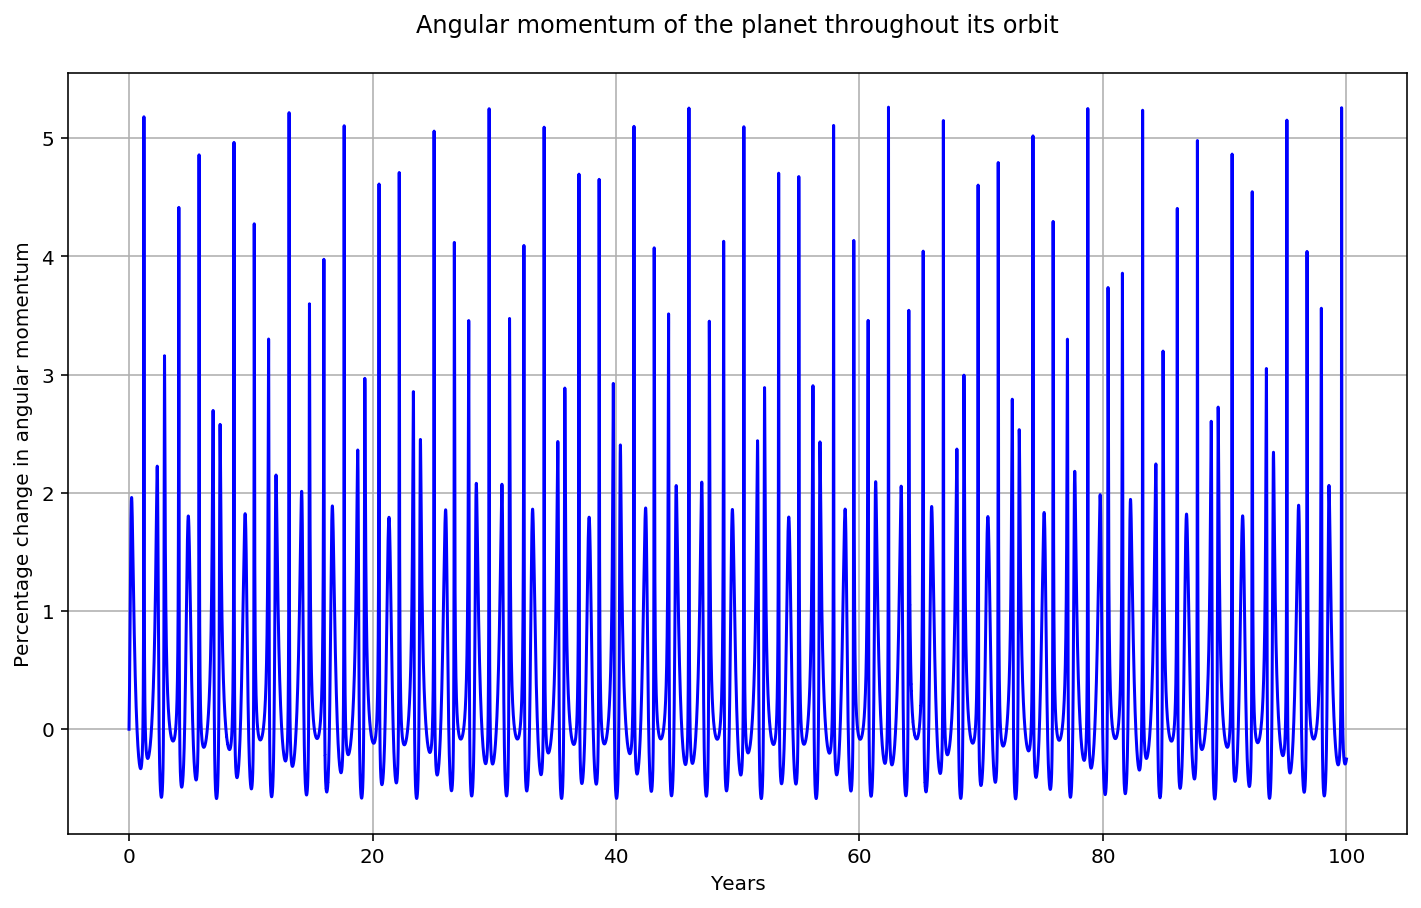

In [33]:
print("Initial percentage change in angular momentum:", ode_ang_mom_2s_perc[0])
print("Maximum percentage change in angular momentum:", max(ode_ang_mom_2s_perc))

plt.figure()

plt.plot(timestep, ode_ang_mom_2s_perc, color = 'b') # Plots the percentage change in angular momentum over time
plt.xlabel('Years')
plt.ylabel('Percentage change in angular momentum')
plt.title('Angular momentum of the planet throughout its orbit\n')

plt.grid()
plt.show()

## 4. Discussion

When comparing the three integration methods for plotting the Mercury-Earth-Sun system, they all correctly plotted the orbits; however, the main differences arise when comparing the plots of their calculated percentage change in total energy and total angular momentum. In this aspect, the fourth-order Runge Kutta method seemed to have performed the best, followed by the scipy.integrate.odeint method and then the scipy.integrate.ode method. This was shown in the ranges of these plots, presented in the table below.

|    Integration method    | Range in percentage change in total energy | Range in percentage change in total angular momentum |
| --- | --- | --- |
| Fourth-order Runge Kutta | 0 to 2.998504386218195e-06 | 0 to -4.4006143519496555e-07 |
|   scipy.integrate.ode    | 0 to 6.371933564589966e-04 | 0 to -8.586008050691553e-05 |
|  scipy.integrate.odeint  | 0 to 5.8836328555323875e-05 | 0 to -7.97061679757594e-06 |

From this, the RK4 integration method had the smallest percentage changes- in the orders of $10^{-6}$ and $10^{-7}$ for percentage change in energy and angular momentum, respectively- which is still not like the theoretical expectation of stable orbits as they should have conserved energy and angular momentum. After this, the odeint method was the next best method to use. However, in reality, some change in these quantities is expected over elliptical orbits and under the influence of other planets and natural satellites (the Moon in the Earth's case).

This order of precision seems reasonable as odeint is the simplest ODE solver in the Scipy module [7] and is commonly used for simpler differential equations. On the other hand, the ode integration method can be changed much more so a better solver can be chosen for it such that it performs better.

These results also elucidate that the RK4 method has the highest order of accuracy (fourth-order) while the other two methods are more inaccurate.

In the case of the binary star plots, the ode method produced a much smaller range for the percentage change in total energy (0 to 0.00470824622514655) compared to the range from the RK4 method (0 to 0.015455412725695847). Interestingly, for the percentage change in total angular momentum, the range from the RK4 method was around 0.03342 smaller.

|    Integration method    | Range in percentage change in total energy | Range in percentage change in total angular momentum |
| --- | --- | --- |
| Fourth-order Runge Kutta | 0 to 0.015455412725695847 | 0 to 5.229557415722403 |
|   scipy.integrate.ode    | 0 to 0.00470824622514655 | 0 to 5.262972024611587 |

During the coding stage of this project, it was noticed that the int type variable 'step_num' defined in section 2.1 played a key role in both the orbit shapes as well as the accuracy of the percentage changes in the energy and angular momentum. As mentioned after defining this variable, increasing it from its initial value of 10,000 to a new value of 50,000 improved the energy and angular momentum plots. However, this had an adverse effect on the planetary orbit plots where it removed the precession of the perihelion of Mercury's orbit. To show this dependence, the calculations for the Mercury-Earth-Sun system from 2.3.1 (and their plots from 3.1.1) are repeated below but with the value of 'step_num' decreased to its original value of 10,000.

Here, only the RK4 method is used, as opposed to the ode and odeint integrations methods that were also used for this configuration of a three-body system, as this was the only method that showed a precession of the perihelion of Mercury's orbit at either value of 'step_num'. Apart from this change and updating variable names to match the situation, the rest of the method used is the same as earlier in order to elucidate the effect of this particular variable.

In [34]:
t = 0 # Resets t to 0
t_tot = 100 # Time in years
step_num = 10000 # Changed back to 10,000 results to show the precession of the perihelion of Mercury's orbit
dt = t_tot / step_num
timestep = np.linspace(t, t_tot, step_num)

# State form: [x1, y1, vx1, vy1, x2, y2, vx2, vy2]
# Plotting using initial conditions of Mercury and the Earth around the Sun
state_initial_mprec = np.array([1, 0, 0, np.sqrt(Gm_star / 1), 0.39, 0, 0, np.sqrt(Gm_star / 0.39)])

state_RK_mprec = np.ndarray((1, 8), np.float)
for i in range(8):
    state_RK_mprec[0, i] = state_initial_mprec[i]

In [35]:
while (t < t_tot):
    state_RK_mprec = np.append(state_RK_mprec, [RK4_func(t, state_RK_mprec[-1,:], s1_p2, dt)], axis = 0)
    t += dt

# Splits the postion and velocity arrays into 4 separate arrays (a position and a velocity array for both planets)
xy_RK4_mprec = np.array([state_RK_mprec[0:, 0], state_RK_mprec[0:, 1]])
xy2_RK4_mprec = np.array([state_RK_mprec[0:, 4], state_RK_mprec[0:, 5]])

v1_RK4_mprec = np.array([state_RK_mprec[0:, 2], state_RK_mprec[0:, 3]])
v2_RK4_mprec = np.array([state_RK_mprec[0:, 6], state_RK_mprec[0:, 7]])

energy_initial_mprec = energy_2p(state_RK_mprec[0, :]) # Initial energy to calculate the percentage change in total energy

# Empty list for the percentage change in total energy
energy_RK_mprec_perc = []

ang_mom_initial_mprec = ang_mom_2p(state_RK_mprec[0, :]) # Initial value of the total angular momentum to calculate the percentage change

# Empty list for the percentage change in total angular momentum
ang_mom_RK_mprec_perc = []

for i in np.arange(0, t_tot, dt):
    j = i * 100 # Multipy by 500 to get an integer to use as the index

    energy_RK_mprec_perc.append((energy_2p(state_RK_mprec[int(j), :]) - energy_initial_mprec) / energy_initial_mprec) # Percentage change between new and initial energy

    ang_mom_RK_mprec_perc.append((ang_mom_2p(state_RK_mprec[int(j), :]) - ang_mom_initial_mprec) / ang_mom_initial_mprec) # Percentage change from initial to new angular momentum

From this single change, there is now a precession in Mercury's orbit, shown below, as predicted by Newton's theory of universal gravitation due to the pull of other planets on one another [8].

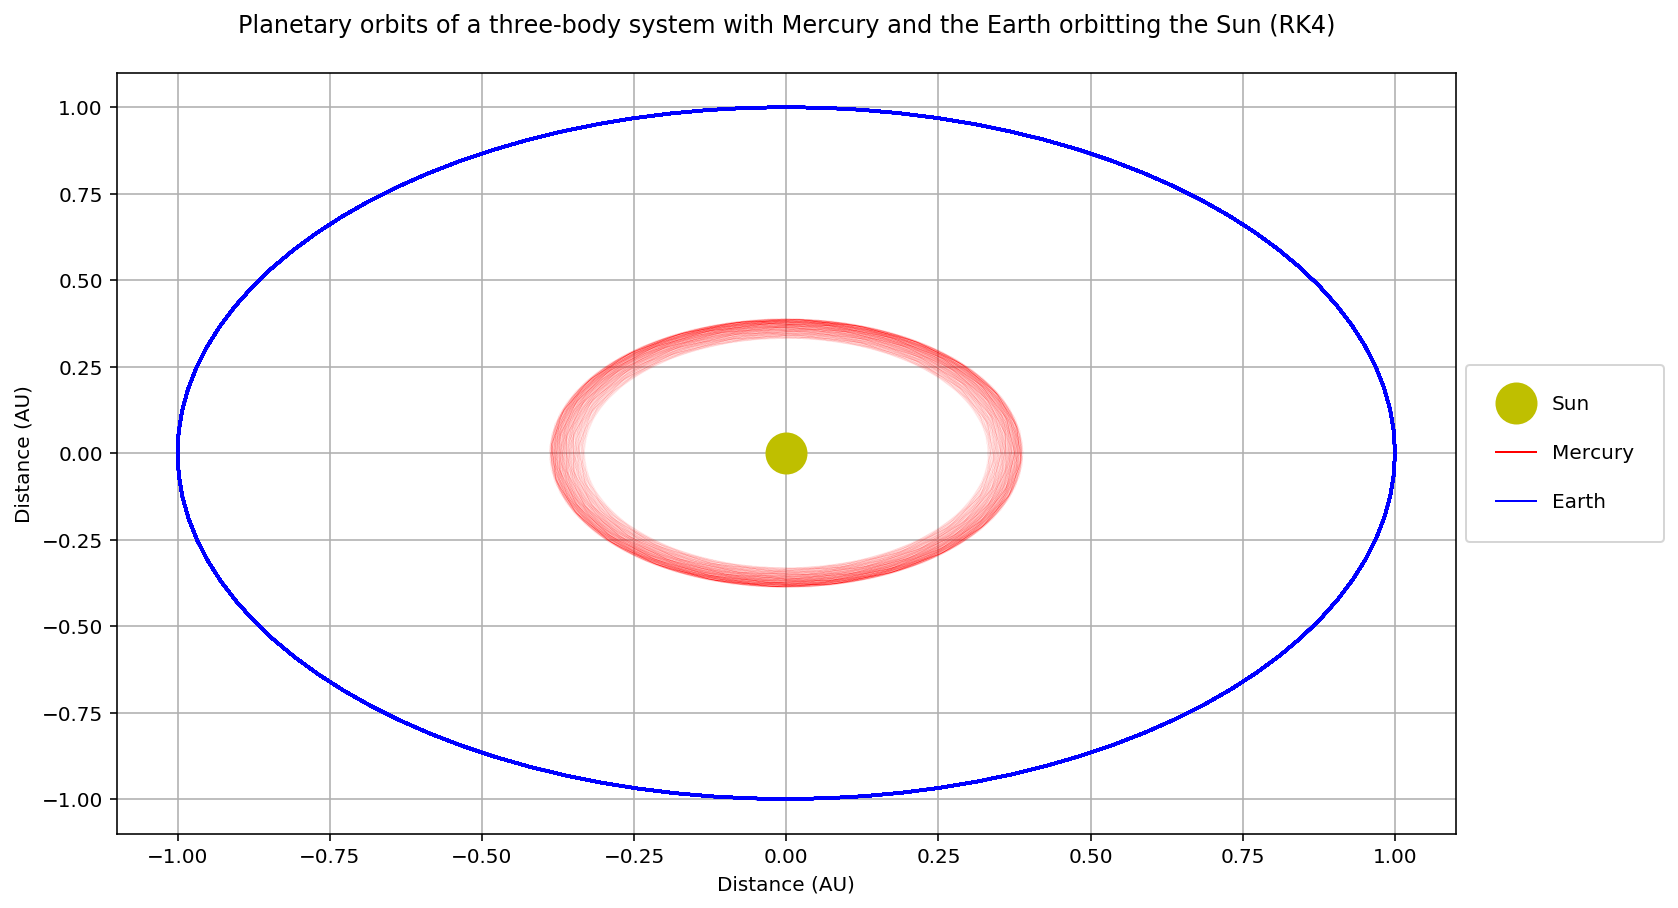

In [36]:
plt.figure()

plt.plot(0, 0, 'yo', linewidth = 2, markersize = 20, label = 'Sun') # Plots the fixed star

# The second planet is closer to the star so it is plotted first to show up higher in the legends box
plt.plot(xy2_RK4_mprec[0], xy2_RK4_mprec[1], color = 'r', linewidth = 0.01, label = 'Mercury') # Plots the orbit of the second planet
plt.plot(xy_RK4_mprec[0], xy_RK4_mprec[1], color = 'b', label = 'Earth') # Plots the orbit of the first planet

plt.xlabel('Distance (AU)')
plt.ylabel('Distance (AU)')
plt.title('Planetary orbits of a three-body system with Mercury and the Earth orbitting the Sun (RK4)\n')

# As before, the legends are collected and then their line widths are resized
legends = plt.legend(loc = 'center left', borderpad = 1.5, labelspacing = 1.5, bbox_to_anchor = (1, 0.5))

for leg in legends.get_lines():
    leg.set_linewidth(1)

plt.grid()
plt.show()

Initial percentage change in energy: -0.0
Final percentage change in energy: 0.020642924900199193


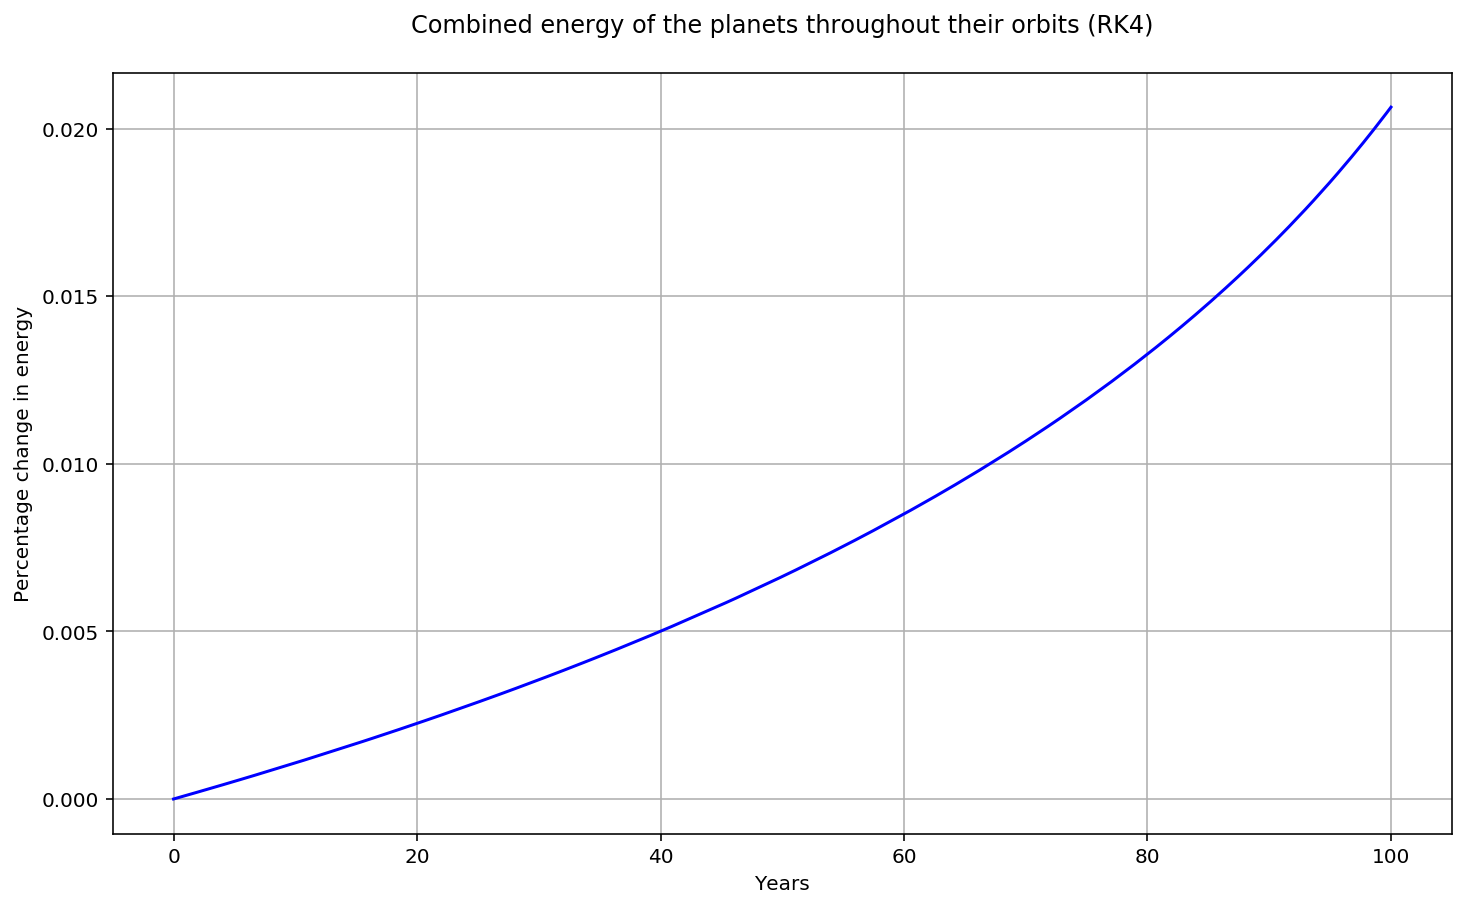

In [37]:
print("Initial percentage change in energy:", energy_RK_mprec_perc[0])
print("Final percentage change in energy:", energy_RK_mprec_perc[-1])

plt.figure()

plt.plot(timestep, energy_RK_mprec_perc, color = 'b') # Plots the percentage change in total energy against time
plt.xlabel('Years')
plt.ylabel('Percentage change in energy')
plt.title('Combined energy of the planets throughout their orbits (RK4)\n')

plt.grid()
plt.show()

Initial percentage change in angular momentum: 0.0
Final percentage change in angular momentum: -0.0024768875345841


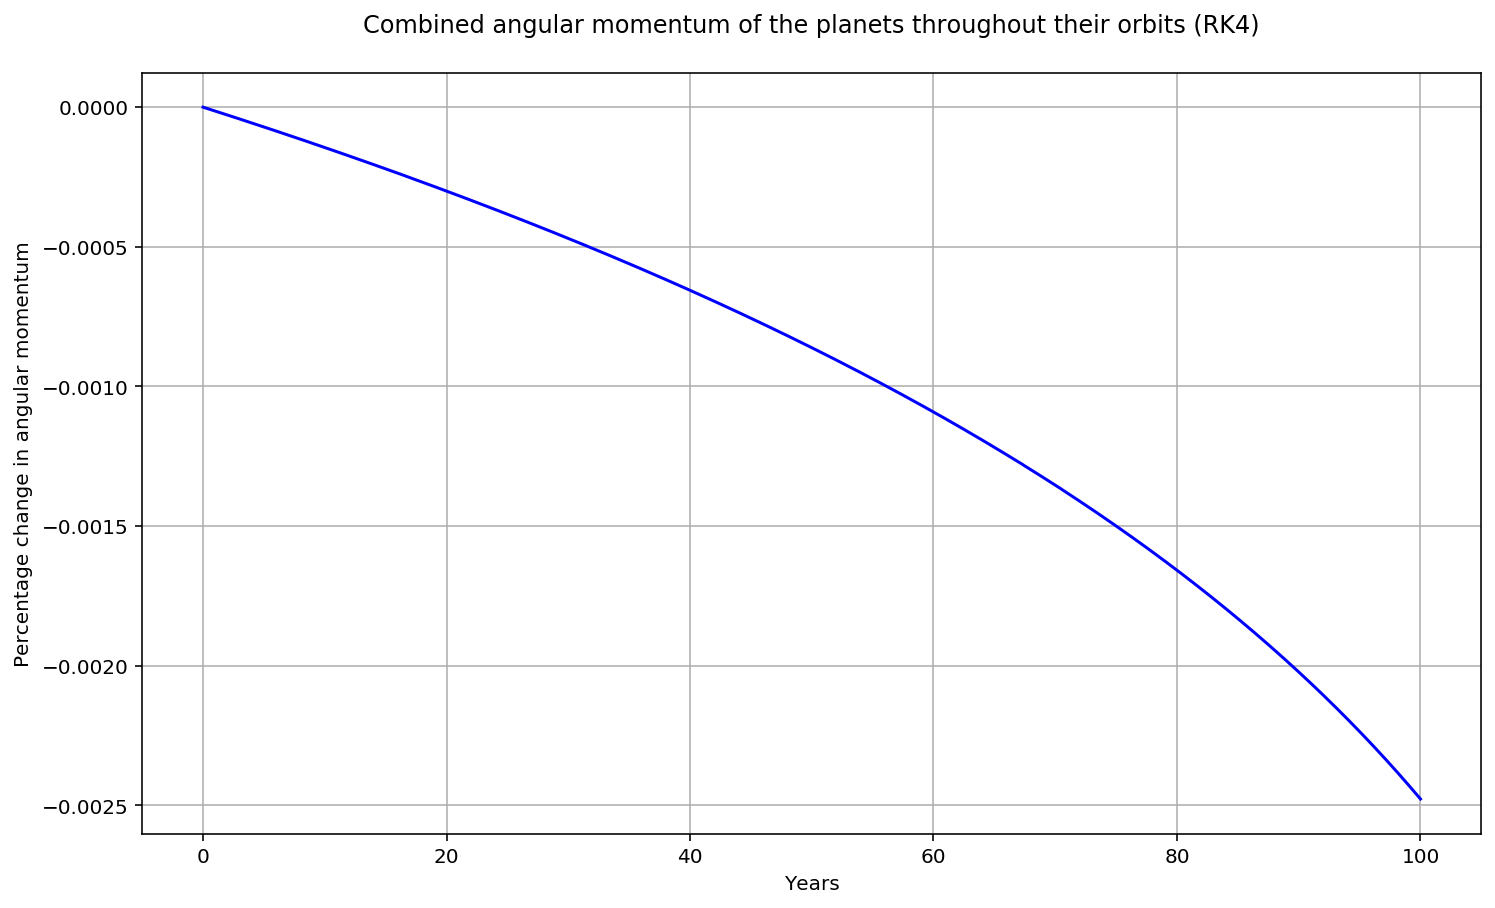

In [38]:
print("Initial percentage change in angular momentum:", ang_mom_RK_mprec_perc[0])
print("Final percentage change in angular momentum:", ang_mom_RK_mprec_perc[-1])

plt.figure()

plt.plot(timestep, ang_mom_RK_mprec_perc, color = 'b') # Plots the percentage change in total angular momentum over time
plt.xlabel('Years')
plt.ylabel('Percentage change in angular momentum')
plt.title('Combined angular momentum of the planets throughout their orbits (RK4)\n')

plt.grid()
plt.show()

From the plots of the percentage change in energy and angular momentum above, a higher 'step_num' proved benefical in obtaining a more accurate integration method.

| Value of 'step_num' | Range in percentage change in total energy | Range in percentage change in total angular momentum |
| --- | --- | --- |
| 10,000 | 0 to 2.0642924900199193e-02 | 0 to -2.4768875345841e-03 |
| 50,000 | 0 to 2.998504386218195e-06 | 0 to -4.4006143519496555e-07 |

As illustrated in this table, dividing the value of 'step_num' by five resulted in the ranges of percentage change of energy and angular momentum increasing by a factor of $10^{4}$.

## 5. Conclusions

In conclusion, this project has been successful in modelling various planetary orbits, in this case, the orbits of Mercury and the Earth around the Sun and a planet's potential orbit in a hypothetical binary star system. This was achieved through the use of three integration methods: the fourth-order Runge Kutta (RK4) method, and two methods from the Scipy module, scipy.integrate.ode and scipy.integrate.odeint. Through examining the energy and angular momentum plots generated from each method in the Mercury-Earth-Sun system, it was found that the RK4 had the greatest precision due to it producing energy and angular momentum values within the smallest range, a range of 0 to 2.998504386218195e-06 in the percentage change in total energy and a range of 0 to -4.4006143519496555e-07 in the percentage change in total angular momentum. On the other hand, the least accurate was the scipy.integrate.ode method which produced ranges of 0 to 6.371933564589966e-04 and 0 to -8.586008050691553e-05 for the percentage change in total energy and the percentage change in total angular momentum, respectively. Here, a difference of two orders of magnitude was present between the most and least accurate integration methods. A further investigation can be conducted between these two methods by using the solve_ivp method (also from the Scipy module), which is able to use higher-order Runge Kutta methods, and choosing a better-suited integrator offered by the ode method.

As explored in the Discussions section, increasing the value of the 'step_num' variable played a significant role in making the energy and angular momentum plots more accurate. This could also be an avenue of further research by using a random step algorithm, perhaps a Markov chain Monte Carlo simulation, to optimise this value for a given model. This variable, however, also provided somewhat of a hindrance to the code in terms of its ease of use. The main issue arose in the multiplier of the temporary variable 'j' and how this depended on the value of 'step_num'. A viable solution to this was presented in section 2.3.3 by utilising list comprehensions in order to remove the need for this temporary variable as each element in the list was run through rather than the index of each element.

In the stable orbits modelled in section 2.3, which were then plotted in section 3.1, it was expected that the energy and angular momentum would be conserved; however, this was not the case as the energy gradually increased over time while the angular momentum decreased. In reality, changes in these quantities are expected due to the influence of the planets on one another. This could be investigated further to determine more accurate trends in these quantities over larger periods of time to predict the evolutions of planetary orbits.

A natural progression from this project would be to model higher body systems, for example, the entire solar system. Additionally, to improve upon this, the eccentricities of these orbits should also be taken into account, instead of the circular orbits created here which would adhere to the elliptical orbits predicted by both Kepler and Newton's theories. These ellipses would better conform with the actual orbits of the planets and also allow for predictions to be made for their development over time.

Moreover, it may be useful to combine the derivative functions for the two variations of a three-body system and to plot the orbits of several planets orbiting a binary star. Like with the point above, this could be used to easily code for a first-order model of distant binary star systems and predict the paths of their exoplanets.

## 6. References

[1] NASA Solar System Exploration. 2008. Orbits and Kepler's Laws | NASA Solar System Exploration. [online] Available at: <https://solarsystem.nasa.gov/resources/310/orbits-and-keplers-laws/> [Accessed 18 December 2021].

[2] Schneider, E., n.d. Deriving the Orbit of the Earth Around the Sun — Physics with Elliot. [online] Physics with Elliot. Available at: <https://www.physicswithelliot.com/orbits-mini-notes> [Accessed 19 December 2021].

[3] En.wikipedia.org. n.d. Orbit modeling - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Orbit_modeling> [Accessed 19 December 2021].

[4] Ssd.jpl.nasa.gov. n.d. Planetary Physical Parameters. [online] Available at: <https://ssd.jpl.nasa.gov/planets/phys_par.html> [Accessed 9 December 2021].

[5] En.wikipedia.org. n.d. Runge–Kutta methods - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods> [Accessed 22 December 2021].

[6] Zonca, A. and Wood, B., 2012. increase the linewidth of the legend lines in matplotlib. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/9706845/increase-the-linewidth-of-the-legend-lines-in-matplotlib> [Accessed 23 December 2021].

[7] Physics LibreTexts. 2021. 10.6: Integrating ODEs with Scipy. [online] Available at: <https://phys.libretexts.org/Bookshelves/Mathematical_Physics_and_Pedagogy/Computational_Physics_(Chong)/10%3A_Numerical_Integration_of_ODEs/10.06%3A_Integrating_ODEs_with_Scipy> [Accessed 24 December 2021].

[8] Aether.lbl.gov. n.d. [online] Available at: <https://aether.lbl.gov/www/classes/p10/gr/PrecessionperihelionMercury.htm> [Accessed 2 January 2022].